# Lending Club Exploratory Data Analysis

In [1]:
##Importing required packages 
if(!require(DBI)){install.packages("DBI"); require(DBI)}
if(!require(RSQLite)){install.packages("RSQLite"); require(RSQLite)}
if(!require(dplyr)){install.packages("dplyr"); require(dplyr)}
if(!require(readxl)){install.packages("readxl"); require(readxl)}
if(!require(tableone)){install.packages("tableone"); require(tableone)}
if(!require(funModeling)){install.packages("funModeling"); require(funModeling)}
if(!require(openintro)){install.packages("openintro"); require(openintro)}
if(!require(ggplot2)) {install.packages("ggplot2");require(ggplot2)}
if(!require(gridExtra)) {install.packages("gridExtra");require(gridExtra)}
if(!require(choroplethr)) {install.packages("choroplethr");require(choroplethr)}
if(!require(choroplethrMaps)) {install.packages("choroplethrMaps");require(choroplethrMaps)}
if(!require(tidyr)){install.packages("tidyr"); require(tidyr)}
if(!require(ggcorrplot)){install.packages("ggcorrplot"); require(ggcorrplot)}
if(!require(nortest)){install.packages("nortest"); require(nortest)}
if(!require(ggpubr)){install.packages("ggpubr"); require(ggpubr)}

Loading required package: DBI
Loading required package: RSQLite
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: readxl
Loading required package: tableone
Warning message:
"package 'tableone' was built under R version 3.5.2"Loading required package: funModeling
Warning message:
"package 'funModeling' was built under R version 3.5.2"Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

funModeling v.1.6.8 :)
Examples and tutorials at livebook.datascienceheroes.com

Loading required package:

In [2]:
###Get Tomas Library
if(!require(devtools)){install.packages("devtools"); require(devtools)}
if(!require(mechkar)){install_github("karpatit/mechkar"); require(mechkar)}

Loading required package: devtools
Loading required package: mechkar
Loading required package: car
Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:openintro':

    densityPlot

The following object is masked from 'package:dplyr':

    recode

Loading required package: sqldf
Loading required package: gsubfn
Loading required package: proto
Loading required package: ROSE
Loaded ROSE 0.0-3

Loading required package: pROC
Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: ResourceSelection
ResourceSelection 0.3-2 	 2017-02-28
Loading required package: sjstats
Warning message in checkMatrixPackageVersion():
"Package version inconsistency detected.
TMB was built with Matrix version 1.2.15
Current Matrix version is 1.2.14
Please re-install 'TMB' from source using install.packages('TMB', type = 'source') or ask CRAN fo

In [3]:
##############################################################################
##########                DATABASE FUNCTIONS                     #############
##############################################################################
            

#### Read function to import data from the SQL to a pandas dataframe.
readSQL <- function(query, db=DB_FILE) {
    require(DBI)
    require(RSQLite)
    con <- dbConnect(SQLite(), DB_FILE)
    df <- dbGetQuery(con, query)
    return(df)
}

#### Write a pandas dataframe into an SQL table. Use overwrite=True if you want to delete 
#### first a pre-existent table with the same name. Use append=True if you want to append
#### the data in the dataframe to a pre-existent table.
writeSQL <- function(df,tablename,overwrite=FALSE, append=FALSE,db=DB_FILE) {
    require(DBI)
    require(RSQLite)
    con <- dbConnect(SQLite(), DB_FILE)
    dbWriteTable(con,tablename,df,overwrite,append)
}
####

In [4]:
DB_FILE = paste0(getwd(),"/Data/loans.db") 

In [5]:
loans = readSQL("SELECT * FROM loans_dataset")

In [6]:
#make a copy - for restore if necessary 
loansdata <- loans

In [7]:
dim(loans)

[1] 255720     48

Sorting the parameters by their type

In [8]:
split(names(loans),sapply(loans, function(x) paste(class(x), collapse=" ")))

$character
[1] "verification_status" "issue_d"             "purpose"            
[4] "emp_length"          "home_ownership"      "full_state"         

$integer
 [1] "pymnt_plan"                  "initial_list_status"        
 [3] "loan_amnt"                   "funded_amnt"                
 [5] "term"                        "collections_12_mths_ex_med" 
 [7] "mths_since_last_major_derog" "delinq_2yrs"                
 [9] "acc_now_delinq"              "inq_last_6mths"             
[11] "mths_since_last_delinq"      "mths_since_last_record"     
[13] "open_acc"                    "pub_rec"                    
[15] "total_acc"                   "tot_coll_amt"               
[17] "open_acc_6m"                 "open_il_6m"                 
[19] "open_il_12m"                 "open_il_24m"                
[21] "mths_since_rcnt_il"          "total_bal_il"               
[23] "open_rv_12m"                 "open_rv_24m"                
[25] "max_bal_bc"                  "inq_fi"                     
[27] "total_cu_tl"                 "inq_last_12m"               
[29] "default"                     "credit_hist"                

$numeric
 [1] "funded_amnt_inv"  "annual_inc"       "dti"              "revol_bal"       
 [5] "revol_util"       "tot_cur_bal"      "il_util"          "all_util"        
 [9] "total_rev_hi_lim" "loan_installment" "acc_ratio"        "poverty_rate_p"

<h3>1.Statistical Analysis</h3>

In [32]:
meta_loans <- funModeling::df_status(loans, print_results = FALSE)
meta_loans%>%
  knitr::kable()



|variable                    | q_zeros| p_zeros|   q_na|  p_na| q_inf| p_inf|type      | unique|
|:---------------------------|-------:|-------:|------:|-----:|-----:|-----:|:---------|------:|
|verification_status         |       0|    0.00|      0|  0.00|     0|     0|character |      3|
|issue_d                     |       0|    0.00|      0|  0.00|     0|     0|character |    103|
|pymnt_plan                  |  255718|  100.00|      0|  0.00|     0|     0|integer   |      2|
|purpose                     |       0|    0.00|      0|  0.00|     0|     0|character |     14|
|initial_list_status         |   70892|   27.72|      0|  0.00|     0|     0|integer   |      2|
|emp_length                  |       0|    0.00|      0|  0.00|     0|     0|character |     12|
|loan_amnt                   |       0|    0.00|      0|  0.00|     0|     0|integer   |   1331|
|funded_amnt                 |       0|    0.00|      0|  0.00|     0|     0|integer   |   1331|
|funded_amnt_inv            

In [9]:
loans$verification_status <-as.factor(loans$verification_status)
loans$purpose <-as.factor(loans$purpose)
loans$emp_length <-as.factor(loans$emp_length)
loans$home_ownership <-as.factor(loans$home_ownership)
loans$term <-as.factor(loans$term)
loans$pymnt_plan <-as.factor(loans$pymnt_plan)
loans$initial_list_status <-as.factor(loans$initial_list_status)
loans$full_state <-as.factor(loans$full_state)
loans$issue_d <- as.Date(loans$issue_d)
loans$default <- factor(loans$default)

In [23]:
summary(loans)

      verification_status    issue_d           pymnt_plan
 Not Verified   :87897    Min.   :2007-06-01   0:255718  
 Source Verified:74300    1st Qu.:2012-08-01   1:     2  
 Verified       :93523    Median :2013-07-01             
                          Mean   :2013-04-17             
                          3rd Qu.:2014-05-01             
                          Max.   :2015-12-01             
                                                         
               purpose       initial_list_status     emp_length   
 debt_consolidation:149464   0: 70892            10+ years:77351  
 credit_card       : 50415   1:184828            2 years  :23910  
 home_improvement  : 15143                       < 1 year :21358  
 other             : 14701                       3 years  :20646  
 major_purchase    :  6388                       5 years  :18231  
 small_business    :  4907                       1 year   :17204  
 (Other)           : 14702                       (Other)  :77020  


In [34]:
meta_loans <-
  meta_loans %>%
  mutate(uniq_rat = unique / nrow(loans)) %>%
  mutate(uniq_rat = scales::percent(uniq_rat))

In [35]:
meta_loans %>%
  select(variable, p_zeros, p_na, unique,uniq_rat) %>% arrange(desc(unique))

variable,p_zeros,p_na,unique,uniq_rat
tot_cur_bal,0.02,25.99,134747,52.7%
revol_bal,0.74,0.00,47755,18.7%
annual_inc,0.00,0.00,19673,7.7%
funded_amnt_inv,0.09,0.00,9554,3.7%
total_rev_hi_lim,0.03,25.99,9543,3.7%
tot_coll_amt,65.52,25.99,4029,1.6%
dti,0.12,0.00,3977,1.6%
loan_installment,0.00,0.00,2190,0.9%
loan_amnt,0.00,0.00,1331,0.5%
funded_amnt,0.00,0.00,1331,0.5%


In [36]:
meta_loans %>%
  select(variable, p_zeros, p_na, unique) %>% arrange(desc(p_na))

variable,p_zeros,p_na,unique
mths_since_rcnt_il,0.00,99.95,50
il_util,0.00,99.95,116
open_acc_6m,0.02,99.94,7
open_il_6m,0.01,99.94,16
open_il_12m,0.03,99.94,7
open_il_24m,0.01,99.94,10
total_bal_il,0.01,99.94,128
open_rv_12m,0.02,99.94,8
open_rv_24m,0.00,99.94,14
max_bal_bc,0.00,99.94,139


In [10]:
## numeric variables
num_vars <- 
  loans %>% 
  sapply(is.numeric) %>% 
  which() %>% 
  names()
num_vars

[1] "loan_amnt"                   "funded_amnt"                
 [3] "funded_amnt_inv"             "collections_12_mths_ex_med" 
 [5] "mths_since_last_major_derog" "annual_inc"                 
 [7] "dti"                         "delinq_2yrs"                
 [9] "acc_now_delinq"              "inq_last_6mths"             
[11] "mths_since_last_delinq"      "mths_since_last_record"     
[13] "open_acc"                    "pub_rec"                    
[15] "revol_bal"                   "revol_util"                 
[17] "total_acc"                   "tot_coll_amt"               
[19] "tot_cur_bal"                 "open_acc_6m"                
[21] "open_il_6m"                  "open_il_12m"                
[23] "open_il_24m"                 "mths_since_rcnt_il"         
[25] "total_bal_il"                "il_util"                    
[27] "open_rv_12m"                 "open_rv_24m"                
[29] "max_bal_bc"                  "all_util"                   
[31] "total_rev_hi_lim"            "inq_fi"                     
[33] "total_cu_tl"                 "inq_last_12m"               
[35] "loan_installment"            "acc_ratio"                  
[37] "credit_hist"                 "poverty_rate_p"

In [11]:
## categorical variables
cat_vars <- 
  loans %>% select(-one_of("default")) %>% 
  sapply(is.factor) %>% 
  which() %>% 
  names()
cat_vars

[1] "verification_status" "pymnt_plan"          "purpose"            
[4] "initial_list_status" "emp_length"          "term"               
[7] "home_ownership"      "full_state"

In [12]:
## other
other_vars <- setdiff(names(loans),c(num_vars,cat_vars))
other_vars

[1] "issue_d" "default"

<h3>2.Table One</h3>

In [40]:
x_vars <- c(cat_vars,num_vars) 

In [41]:
tab1 <- Table1(data = loans,x = x_vars,y = "default")

  |======================================================================| 100%

Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()


In [ ]:
##Export to txt to put in protocol
write.table(tab1,paste0(getwd(),"/table1New.txt"), append = FALSE, sep = ";", dec = ".",col.names = TRUE,row.names = FALSE)

In [42]:
tab1%>% arrange(desc(pval))

V1,V2,Pop,0,1,pval
pymnt_plan,1,2 (0.0%),2 (0.0%),0 (0.0%),1
pub_rec,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.364
tot_coll_amt,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.152
revol_bal,Median (IQR),"10,917.0 (5,831.0-19,082.0)","10,833.0 (5,759.0-19,058.5)","11,302.0 (6,170.0-19,213.0)",0.142
acc_now_delinq,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.009
loan_installment,Median (IQR),277.8 (194.4-416.7),277.8 (193.1-416.7),283.3 (200.0-416.7),0.003
collections_12_mths_ex_med,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.001
verification_status,Source Verified,"74,300 (29.1%)","60,478 (28.8%)","13,822 (30.0%)",0
purpose,credit_card,"50,415 (19.7%)","42,520 (20.3%)","7,895 (17.2%)",0
initial_list_status,1,"184,828 (72.3%)","151,134 (72.1%)","33,694 (73.2%)",0


we can already see some variables that have p-value>0.05, for example pub_rec,pymnt_plan,  and variables that have p-value <0.05, for example acc_now_delinq,loan_installment. 

In [ ]:
tab1%>% filter(grepl("Missing",V2) )%>% arrange(Pop)

We can also see that we have a lot of variables with a very high missing rate like open_acc_6m, and total_bal_il.

In [ ]:
tab1%>% filter(grepl("Mean",V2) | grepl("Median",V2))%>% arrange(V1)

In another outlook of the table we can see which variables have median that is similar to their mean, which can be an indicator to a normal distribution. From the other hand, we can see which variables have median that differ from their median, and there for not normally distributed.

<b>Create Report from ExploreData function

In [ ]:
exploreData(data = loans,x = x_vars,y = "default")

<h3>3.Graphics</h3>

<b>Numeric Variables: histogram (distplot)

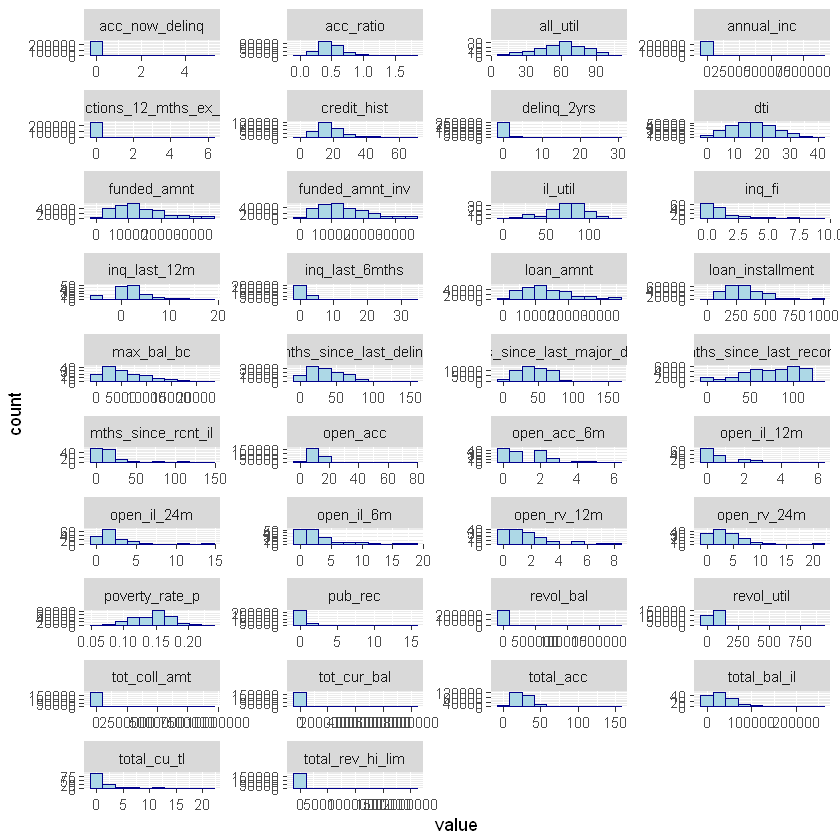

In [57]:
options(scipen = 999)
loans %>%
  select_(.dots = num_vars) %>%
  gather_("variable", "value", gather_cols = num_vars) %>%
  ggplot(aes(x = value)) +
  facet_wrap(~variable,  scales = "free", ncol = 4)+
 geom_histogram(color="darkblue", fill="lightblue",na.rm = TRUE,bins = 10)

In the plot above we can see the histogram of all the numerical veriables. It shold be noted that some of the variables are count variables.
From the histograms we can get another insights about the data distributions.

<b>Numeric Continuous Variables: normality distribution test  

<b>Normality distribution check  </b>
<br> In this part we performed Kolmogorov-Smirnov normality test.
<br>The Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous, one-dimensional probability <br>distributions that can be used to compare a sample with a reference probability distribution.
<br>we did used it to check our variables distributions against theoretical normal distribution.
<br>Also we performed an Anderson-Darling normality test for the composite hypothesis of normality.

In [45]:
integer_vars <- 
  loans %>% 
  sapply(is.integer) %>% 
  which() %>% 
  names()

In [46]:
continuous_vars<-num_vars[!(num_vars%in%integer_vars)]
continuous_vars

[1] "funded_amnt_inv"  "annual_inc"       "dti"              "revol_bal"       
 [5] "revol_util"       "tot_cur_bal"      "il_util"          "all_util"        
 [9] "total_rev_hi_lim" "loan_installment" "acc_ratio"        "poverty_rate_p"

In [47]:
for (v in continuous_vars) {
    print(v)
    print(ad.test(loans[,v]))
    print(ks.test(loans[,v], "pnorm",alternative='two.sided'))
}

[1] "funded_amnt_inv"

	Anderson-Darling normality test

data:  loans[, v]
A = 4443.5, p-value < 0.00000000000000022


	One-sample Kolmogorov-Smirnov test

data:  loans[, v]
D = 0.99891, p-value < 0.00000000000000022
alternative hypothesis: two-sided

[1] "annual_inc"

	Anderson-Darling normality test

data:  loans[, v]
A = 18471, p-value < 0.00000000000000022


	One-sample Kolmogorov-Smirnov test

data:  loans[, v]
D = 1, p-value < 0.00000000000000022
alternative hypothesis: two-sided

[1] "dti"

	Anderson-Darling normality test

data:  loans[, v]
A = 396.94, p-value < 0.00000000000000022


	One-sample Kolmogorov-Smirnov test

data:  loans[, v]
D = 0.97069, p-value < 0.00000000000000022
alternative hypothesis: two-sided

[1] "revol_bal"

	Anderson-Darling normality test

data:  loans[, v]
A = 22583, p-value < 0.00000000000000022


	One-sample Kolmogorov-Smirnov test

data:  loans[, v]
D = 0.99231, p-value < 0.00000000000000022
alternative hypothesis: two-sided

[1] "revol_util"

	Ande

Acording to the KS test not even one of our veriables is normaly distributed. 
<br>With that being said, we can see that there are some variables that more closer to normal distibution, specially
proverty rate and acc ratio, which are the data we created to enriched the data.
<br>Acording to the Anderson-Darling test the only numerical variable which normally distributed is all_util.

<b>Q–Q plots</b>
<br>A Q–Q plot is a plot of the quantiles of two distributions against each other, or a plot based on estimates of the quantiles.
<br>We did plot a Q-Q plots of our variables distributions against theoretical normal distribution.

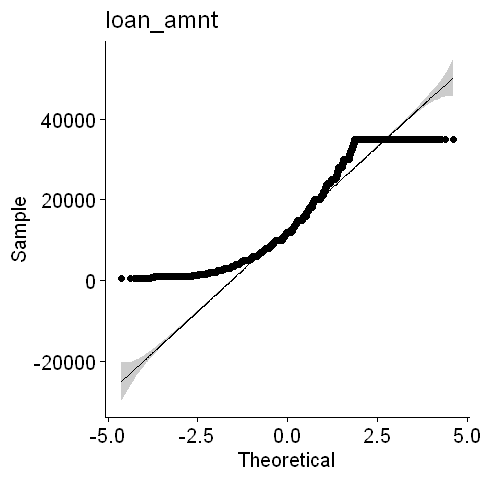

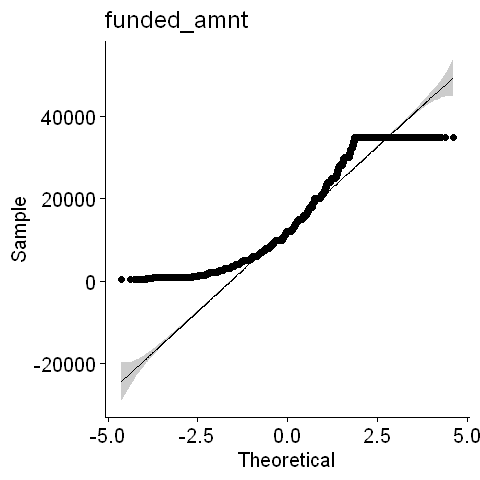

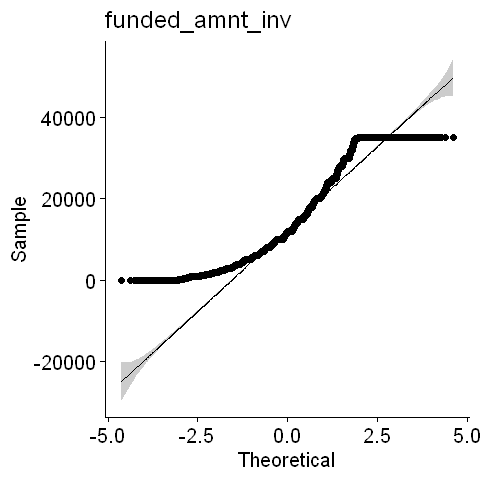

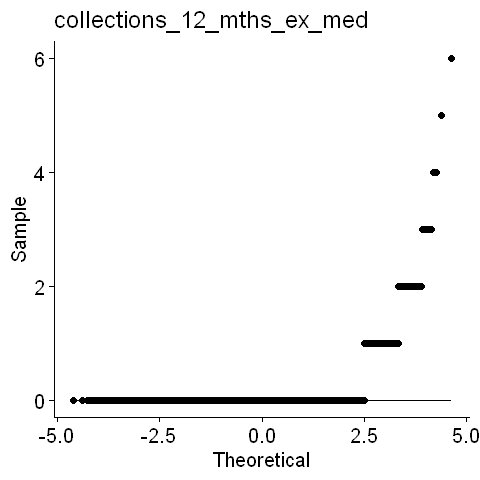

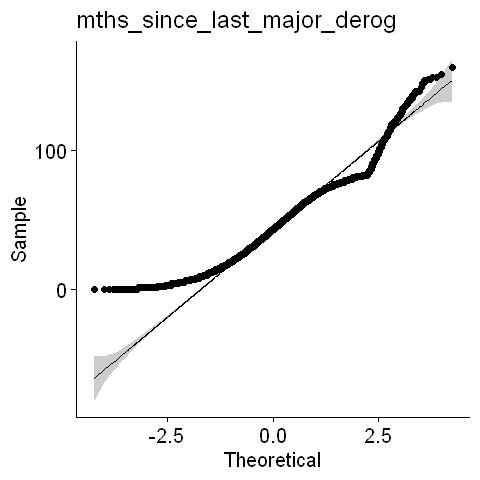

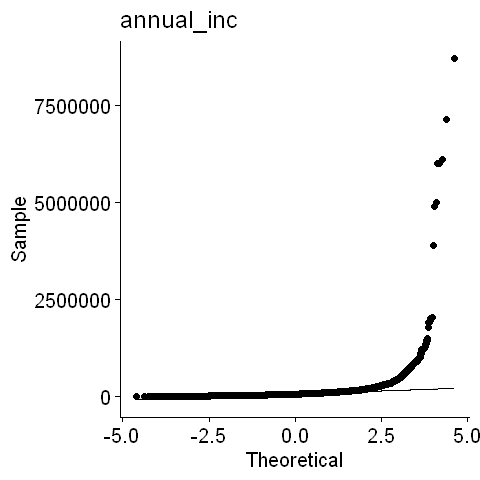

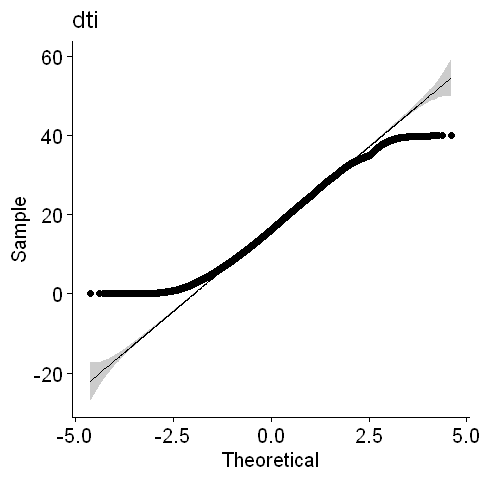

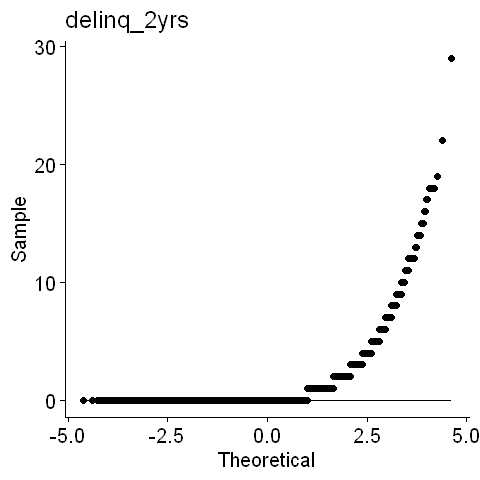

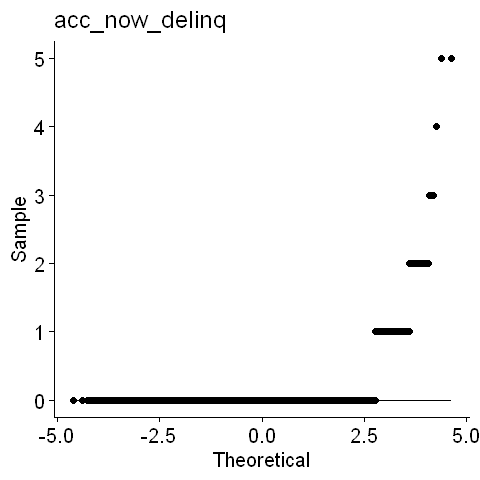

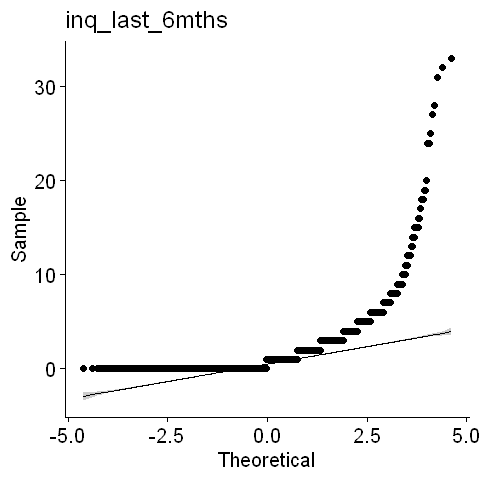

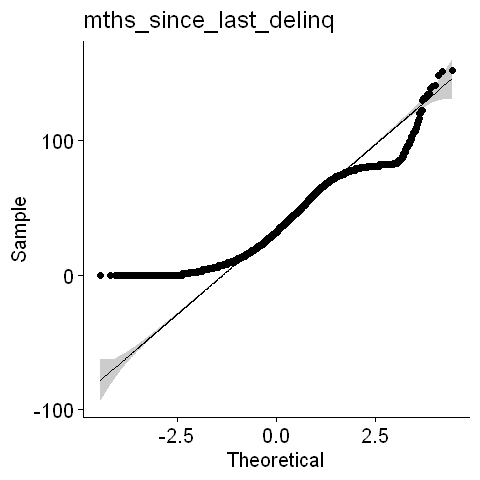

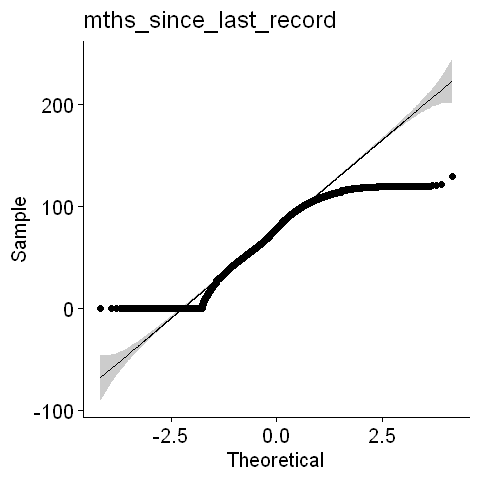

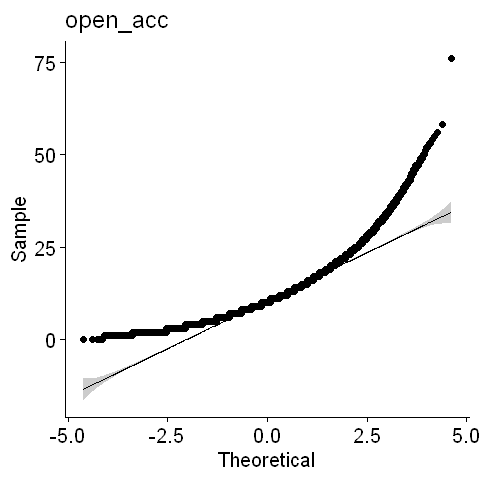

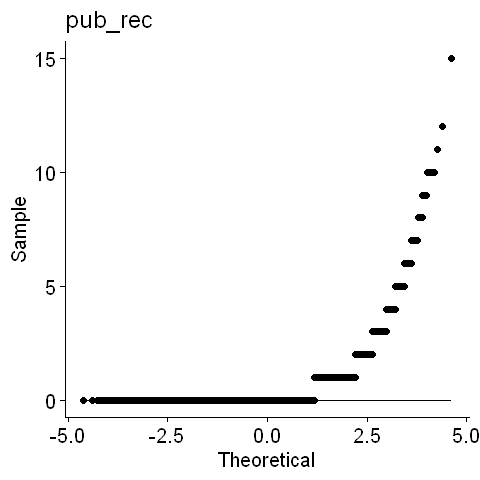

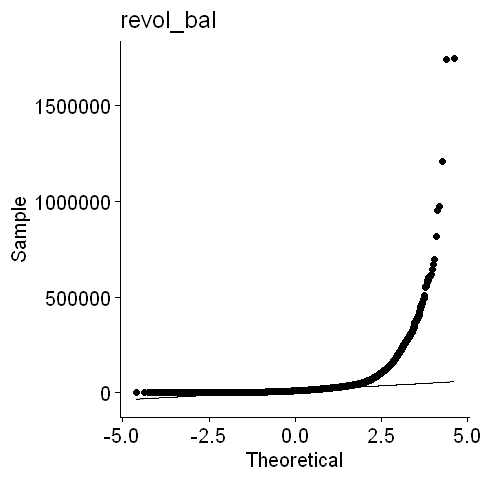

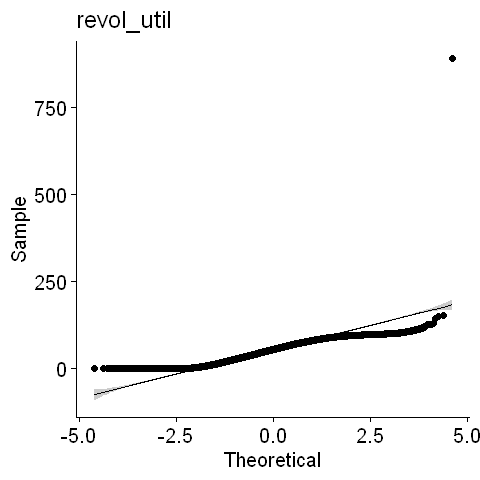

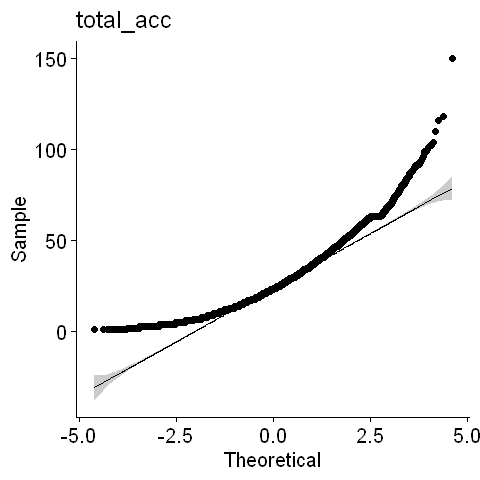

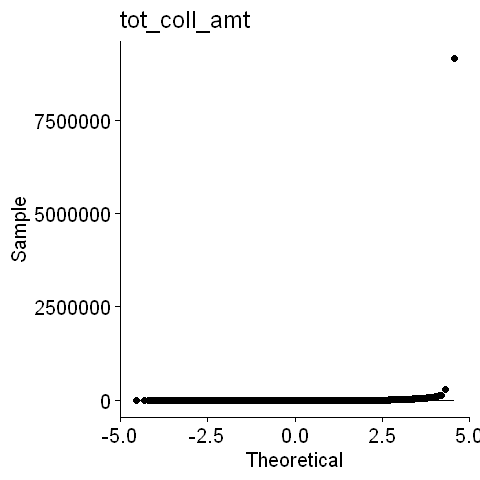

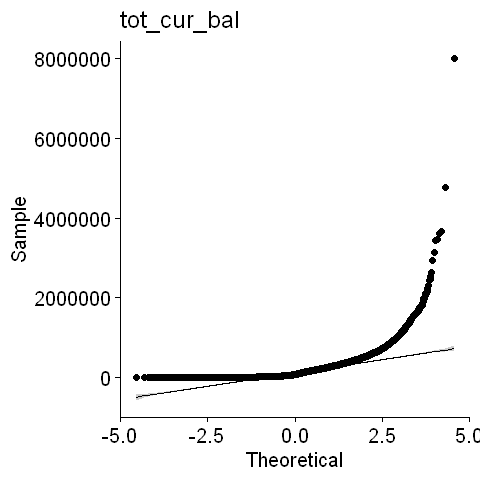

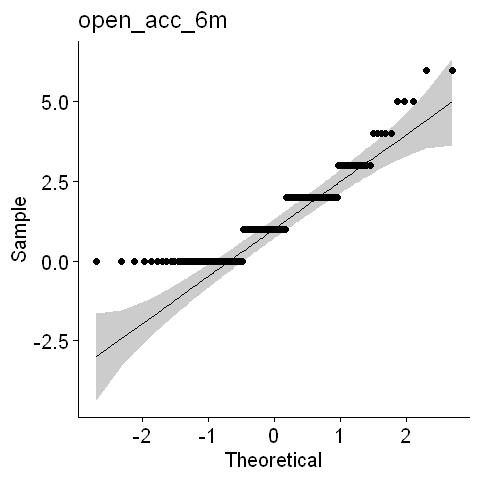

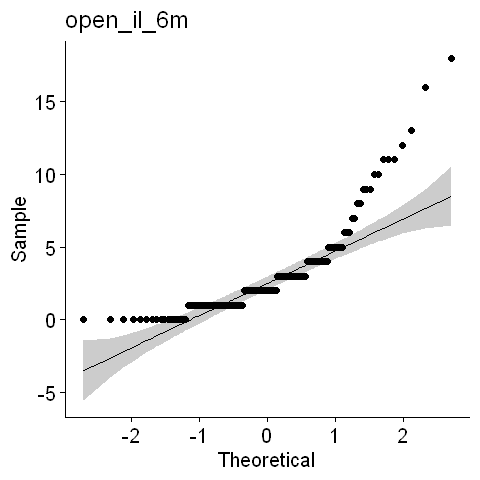

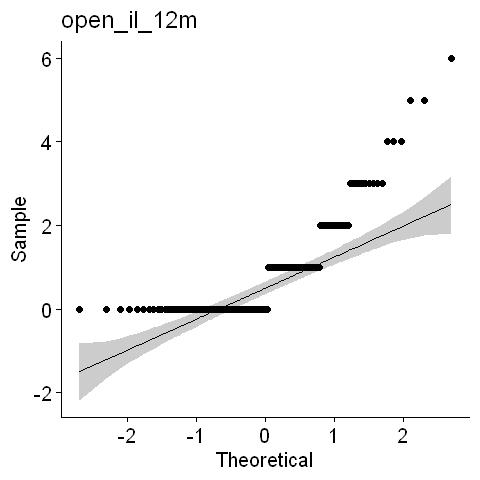

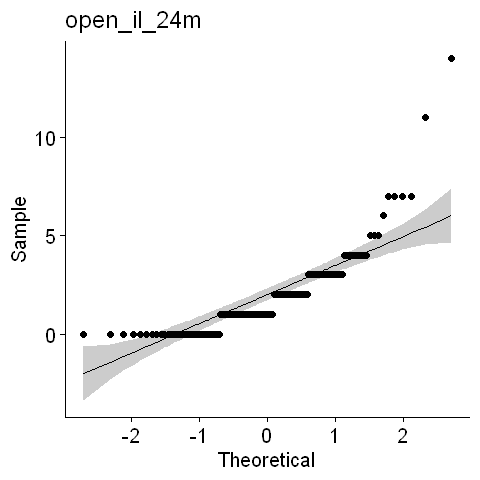

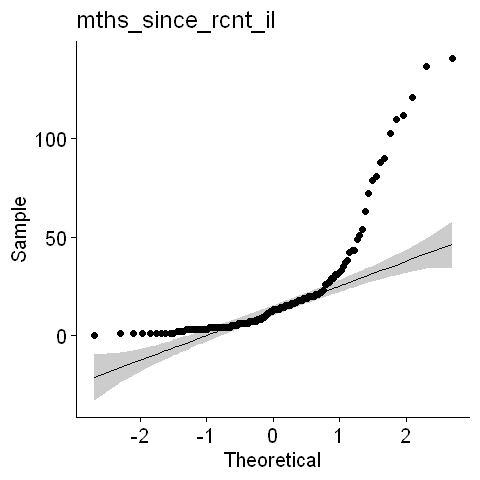

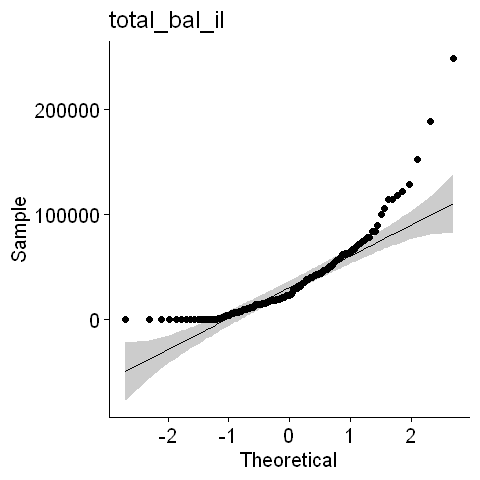

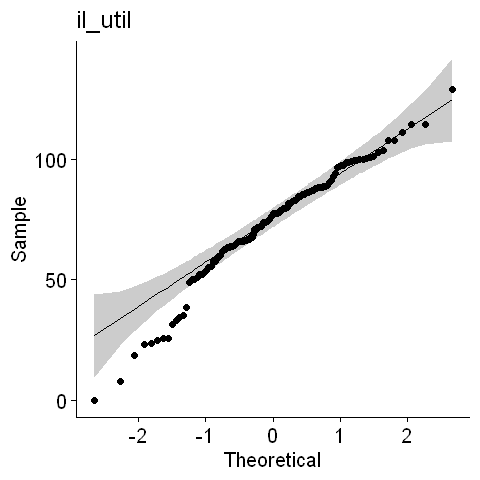

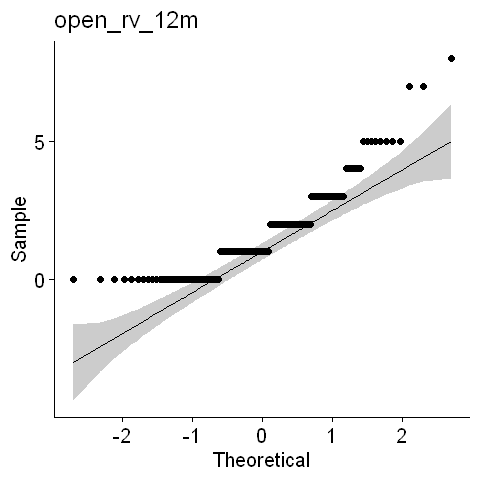

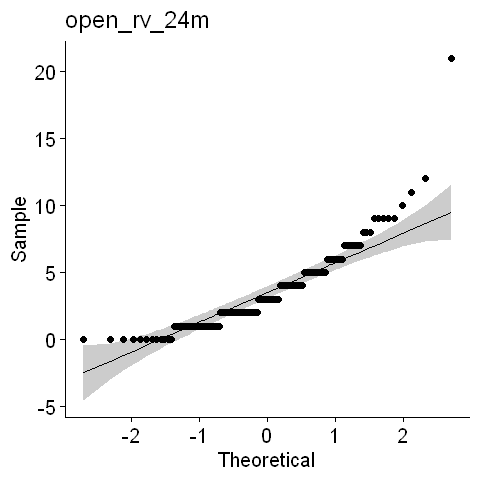

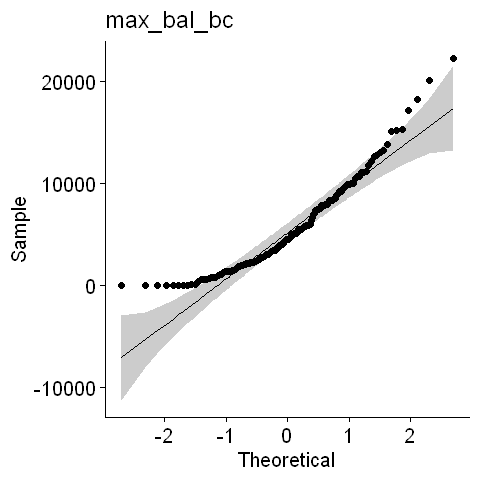

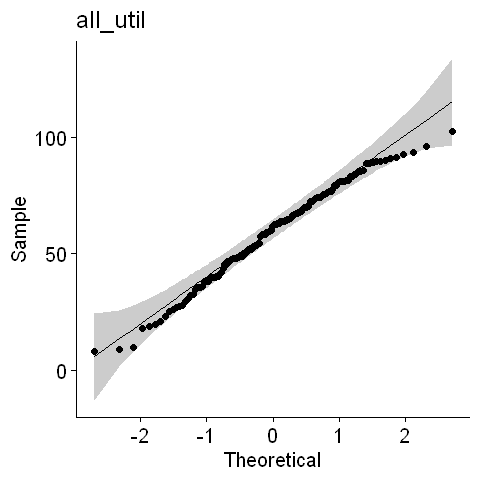

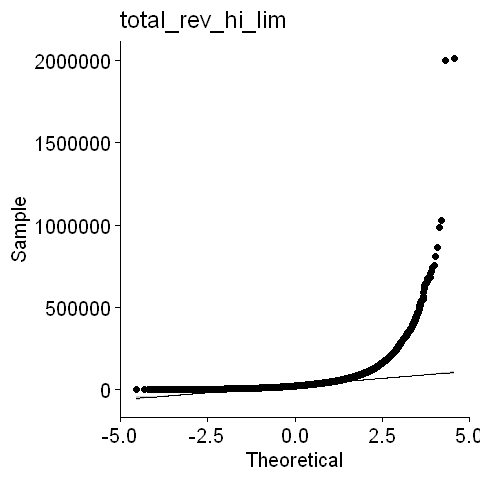

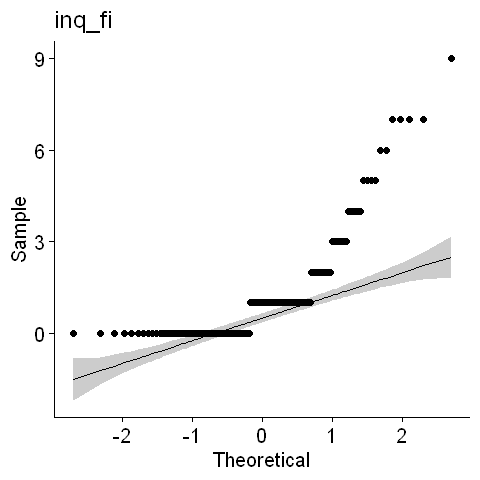

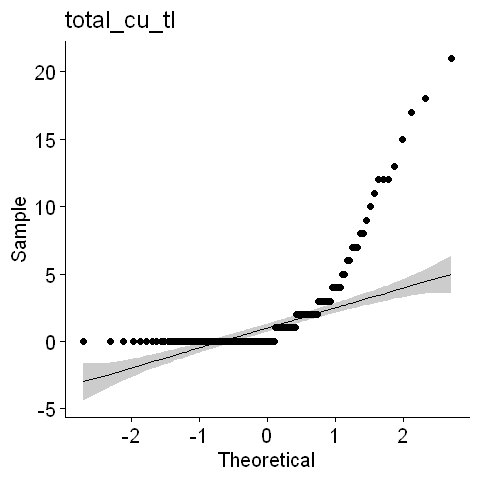

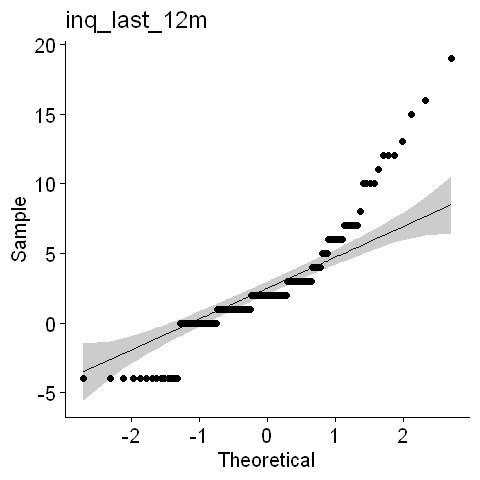

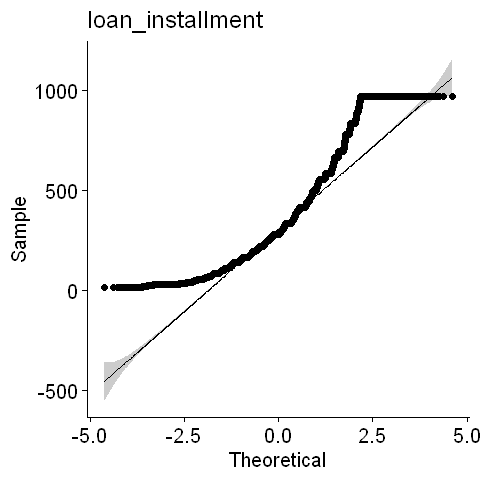

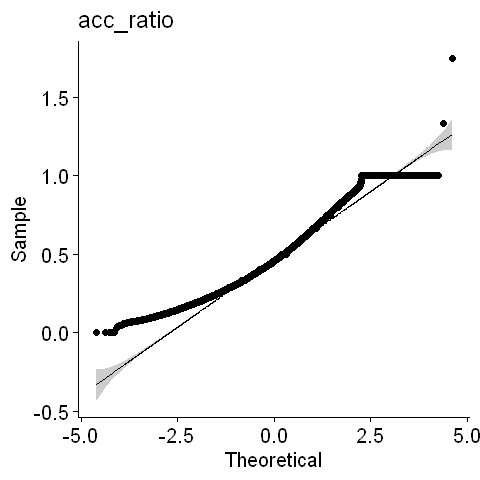

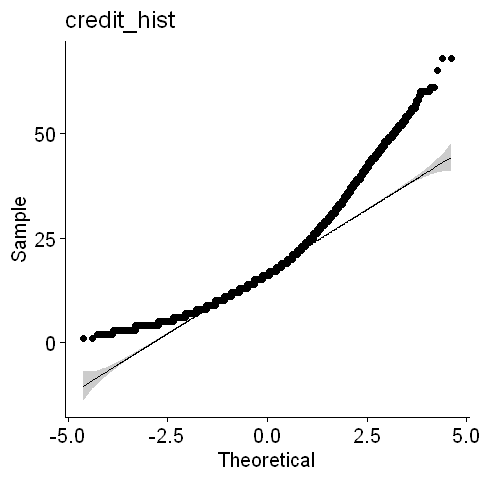

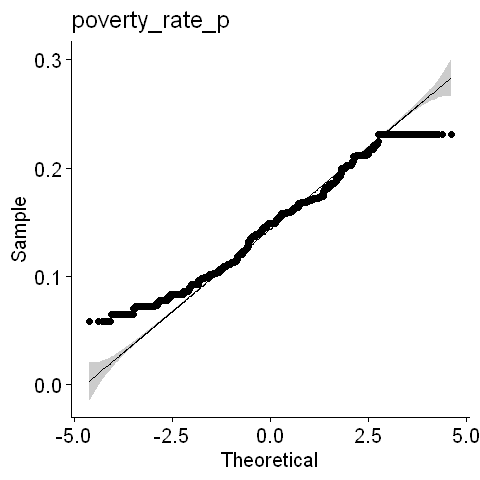

In [51]:
options(repr.plot.width=4, repr.plot.height=4)
par(mfrow=c(2,2))
for (v in num_vars) {
    print(ggqqplot(loans[,v],title = v))
}

<b>Categorical variables: barplot

<b> Loans By verification_status

In [62]:
ver_df <- loans %>% 
  select(verification_status,default) %>% 
  group_by(verification_status,default) %>% 
  summarise(Count = n())%>% 
select(verification_status,Count,default) 

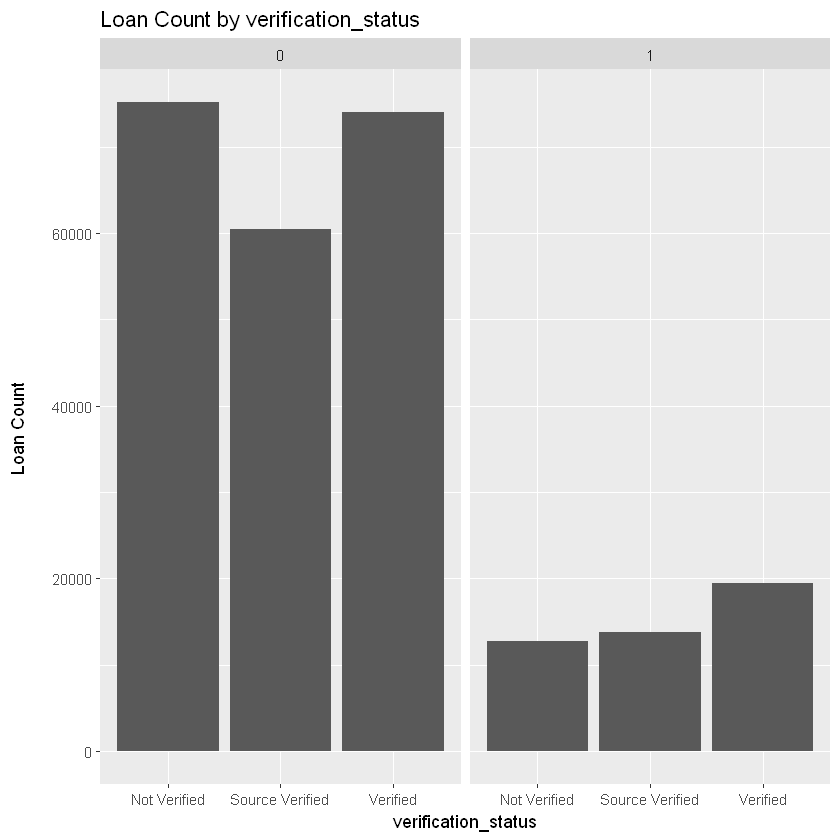

In [63]:
ver_df %>%
  ggplot(aes(verification_status,Count)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Count by verification_status", x = "verification_status", y = "Loan Count \n")

Not verified loans are the most common loans among the paid loans but the least most common among the un paid loans! 

<b> Loans By pymnt_plan

In [64]:
pymnt_plan_df <- loans %>% 
  select(pymnt_plan,default) %>% 
  group_by(pymnt_plan,default) %>% 
  summarise(Count = n())%>% 
select(pymnt_plan,Count,default) 

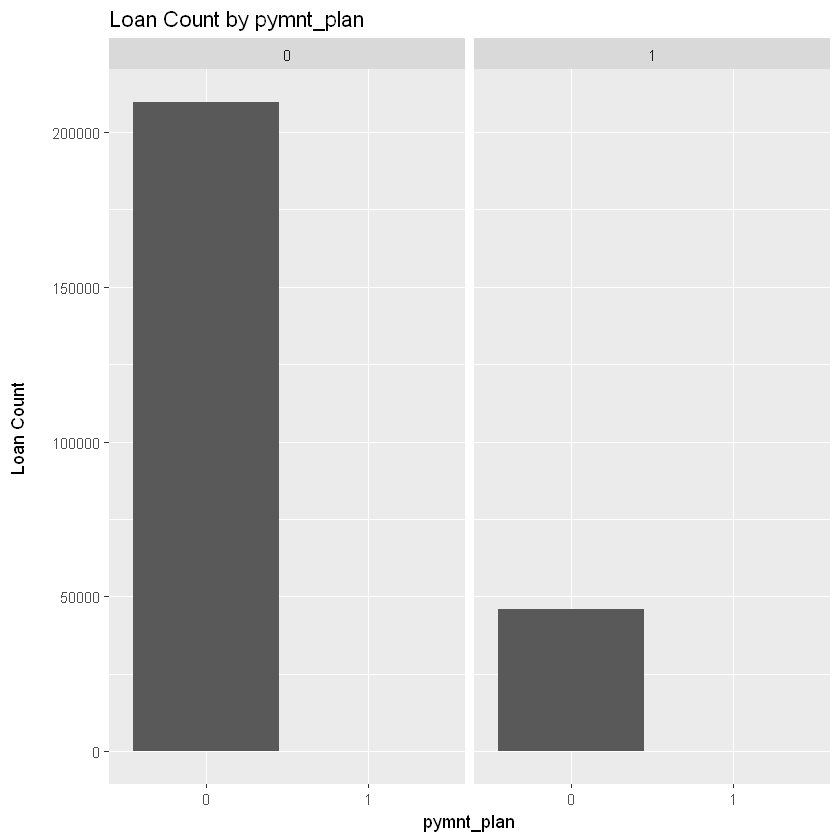

In [65]:
pymnt_plan_df %>%
  ggplot(aes(pymnt_plan,Count)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Count by pymnt_plan", x = "pymnt_plan", y = "Loan Count \n")

<b>Loans by purpose

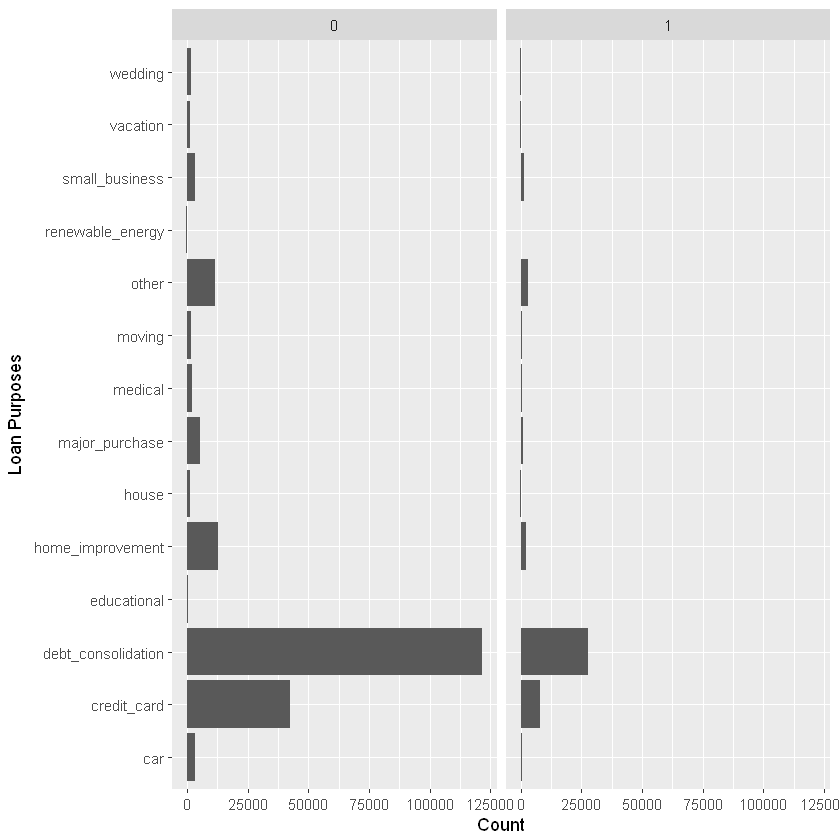

In [68]:
purposes_df <- loans %>% 
  select(purpose, loan_amnt,default) %>% 
  group_by(purpose,default) %>% 
  summarise(Count = n())
g <- ggplot(purposes_df, 
                  aes(x = purpose, y = Count))
g + geom_col() + xlab("Loan Purposes")+ coord_flip()+facet_wrap(~ default)

In the plot above, we can see the number of loans issued to the different purposes, divided to loans that had paid successfully and loan that diWe can see that debt consolidation is the most common purpose and credit card is the second most common. From this graph we didn’t identified any purpose that has higher defaulted ratio then others, even though with the help of table one above, we could identified that Purpose is a good variable at separating between the paid loans to the defaulted.

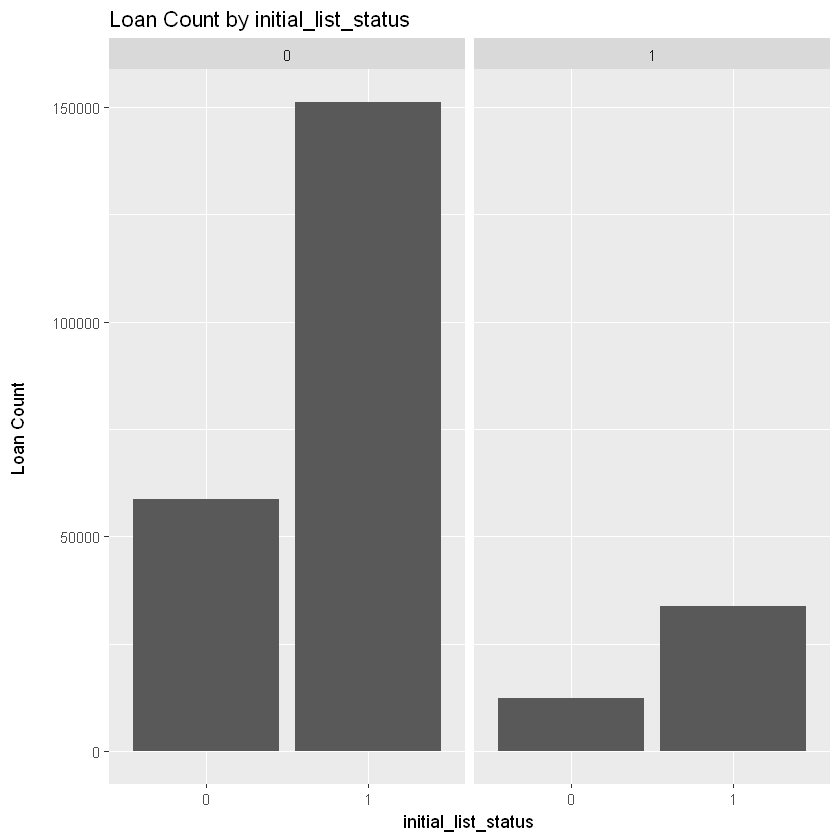

In [69]:
initial_list_status_df <- loans %>% 
  select(initial_list_status,default) %>% 
  group_by(initial_list_status,default) %>% 
  summarise(Count = n())%>% 
select(initial_list_status,Count,default) 

initial_list_status_df %>%
  ggplot(aes(initial_list_status,Count)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Count by initial_list_status", x = "initial_list_status", y = "Loan Count \n")

<b> Loans By Emp Length

In [70]:
emp_df <- loans %>% 
  select(emp_length,default) %>% 
  group_by(emp_length,default) %>% 
  summarise(Count = n())%>% 
select(emp_length,Count,default) 

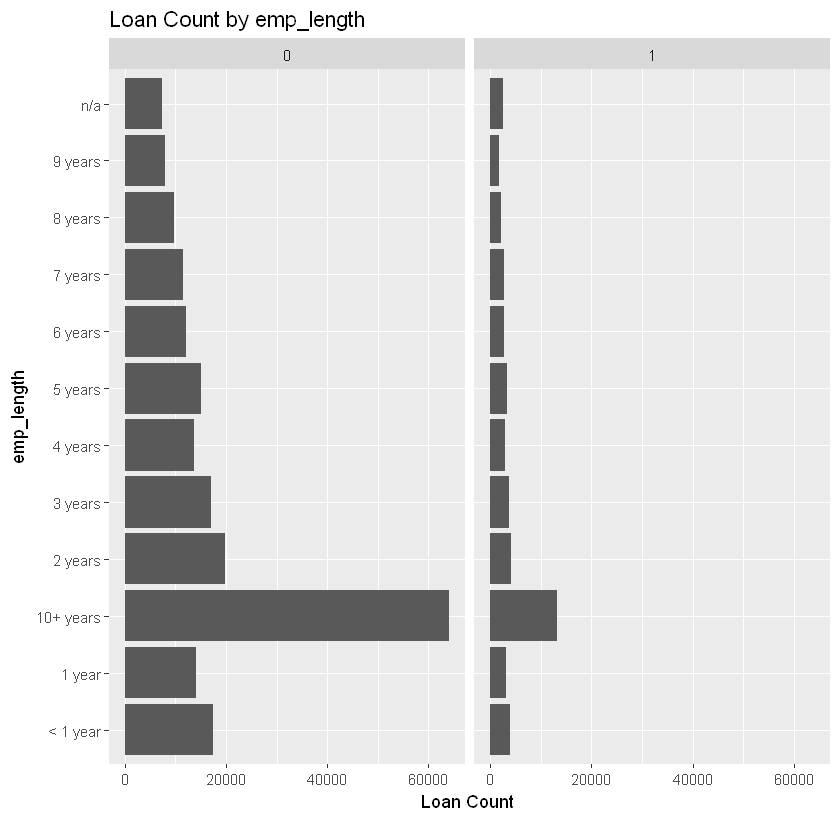

In [71]:
emp_df %>%
  ggplot(aes(emp_length,Count)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Count by emp_length", x = "emp_length", y = "Loan Count \n")+ coord_flip()

<b> Loans By Home Ownership

In [13]:
home_df <- loans %>% 
  select(home_ownership,default) %>% 
  group_by(home_ownership,default) %>% 
  summarise(Count = n())%>% 
select(home_ownership,Count,default) 

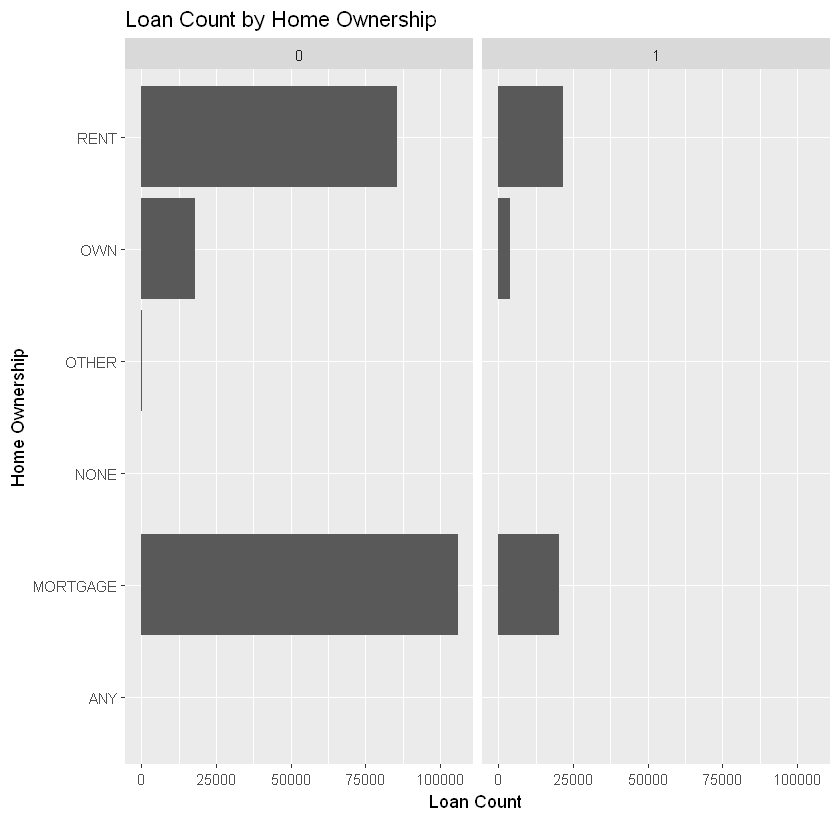

In [14]:
home_df %>%
  ggplot(aes(home_ownership,Count)) +
  geom_col() +
  facet_wrap(~ default) +
  coord_flip() +
  labs(title="Loan Count by Home Ownership", x = "Home Ownership", y = "Loan Count \n")

From the plot above we can see that the ratio of borrower's whom took mortgage to borrower's which are renting is higher for borrowers that paid off their loans successfully.

<b> Loans By Term

In [78]:
loans$term_fac<- factor(loans$term,labels=c("36 Months", "60 Months"))

In [79]:
term_df <- loans %>% 
  select(term_fac, loan_amnt,default) %>% 
  group_by(term_fac,default) %>% 
  summarise(Count = n())%>% 
select(term_fac,Count,default) 

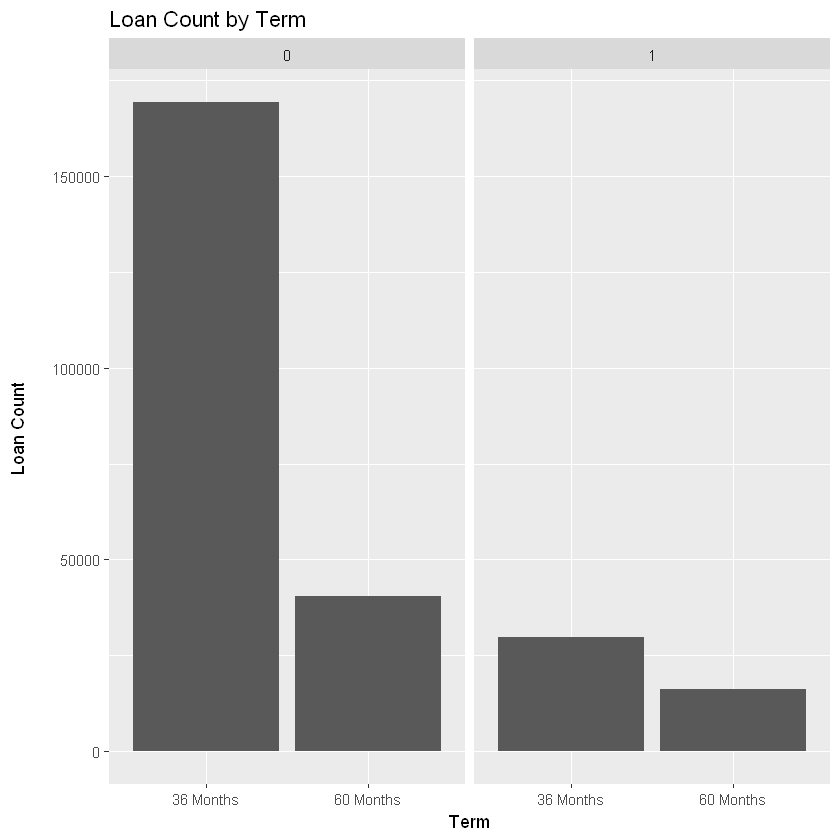

In [80]:
term_df %>%
  ggplot(aes(term_fac,Count)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Count by Term", x = "Term", y = "Loan Count \n")

We can see that more loans are taken with 36 month term than in the 60 month term period.

<b>Loans By States

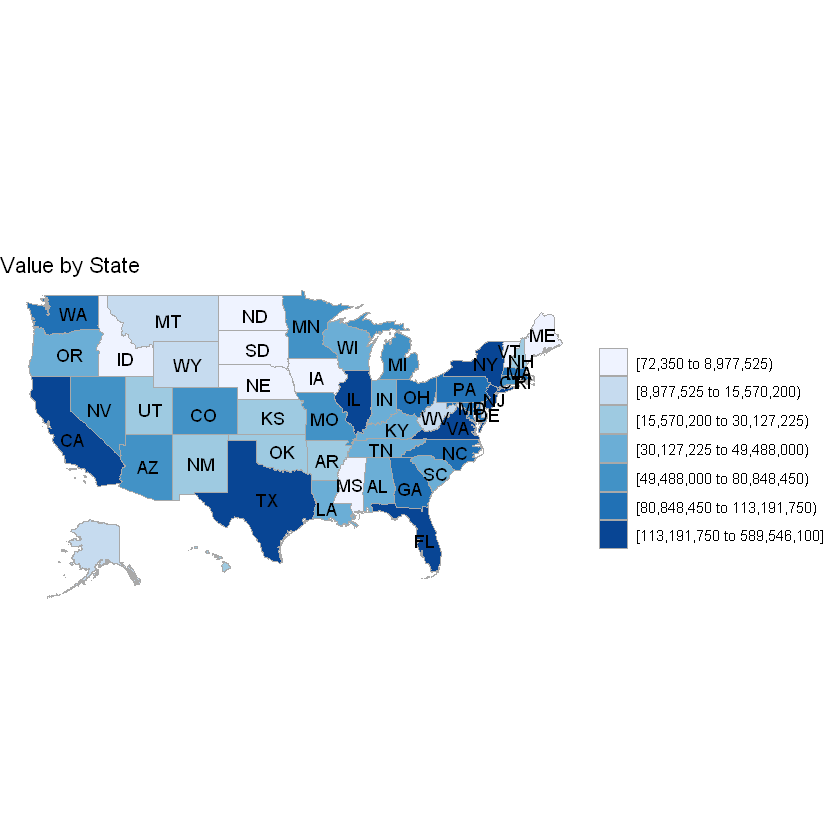

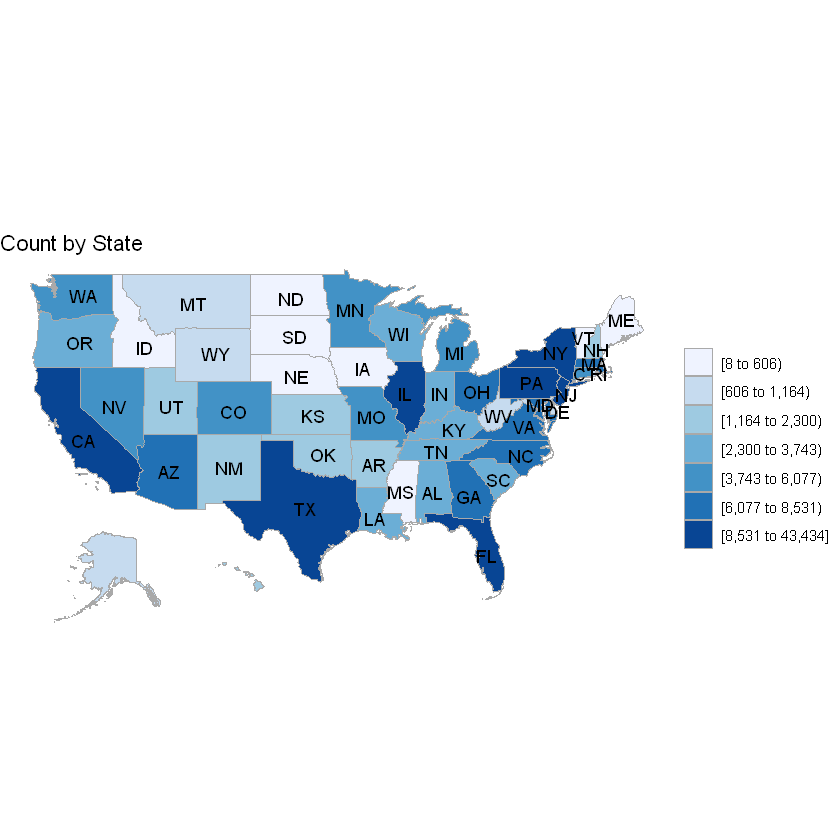

In [82]:
state_by_value <-
loans %>%rename(region = full_state) %>%mutate(region=tolower(region))%>% group_by(region) %>%
  summarise(value = sum(loan_amnt, na.rm=TRUE))

state_choropleth(state_by_value, title = "Value by State")

state_by_volume <-
loans %>%rename(region = full_state) %>%mutate(region=tolower(region))%>% group_by(region) %>%
  summarise(value = n())

state_choropleth(state_by_volume, title = "Count by State")

We can see that Lending Club activity in the different states is highly differ by the number of the loans are issued and by their total value and volume. 

<b>Checking PovertyRates Changes Vs Volume Of Loans By States

In [85]:
amnt_df <- loans %>% 
  select(issue_d, loan_amnt,full_state,poverty_rate_p)%>% mutate(full_state=tolower(full_state))%>% mutate(issue_d=format(as.Date(issue_d, format="%d/%m/%Y"),"%Y")) %>%
  group_by(issue_d,full_state,poverty_rate_p) %>% 
  summarise(Count = n())

In [90]:
head(state_by_volume%>% arrange(desc(value)),10)

region,value
california,43434
new york,21586
texas,19524
florida,17776
new jersey,9734
illinois,9400
pennsylvania,8531
georgia,8118
virginia,8021
ohio,7841


In [91]:
head(state_by_volume%>% arrange(value),10)

region,value
north dakota,8
idaho,9
iowa,13
maine,13
nebraska,44
mississippi,428
vermont,431
south dakota,547
wyoming,606
alaska,668


In [87]:
plotPovertyLoansByCountry <- function(data,states){
   i <- 1
   glist <- list();
   for (state in states){
      df <- data %>%filter(full_state==state)
      g2 <- ggplot(df, aes(issue_d, Count)) +
               geom_point(data=df, aes(x=issue_d, y=Count,  size=poverty_rate_p))
      g2 <-g2 +labs(title=paste0("Loans Count Over PovertyRate in ",state))
      glist[[i]] <- g2
      i <- i + 1
    }
  return(glist)
} 

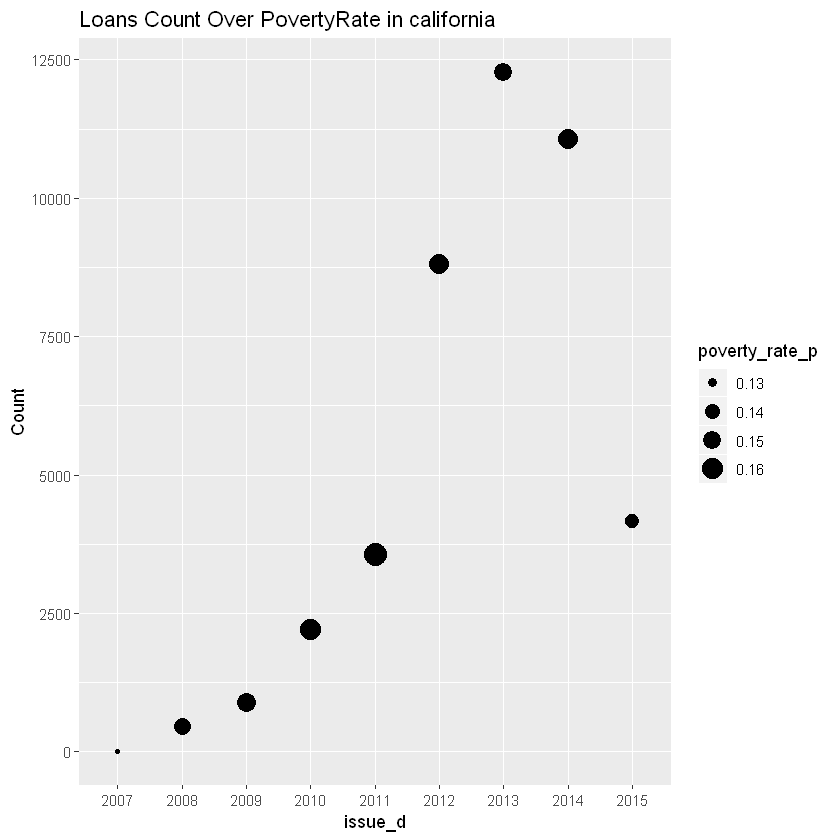

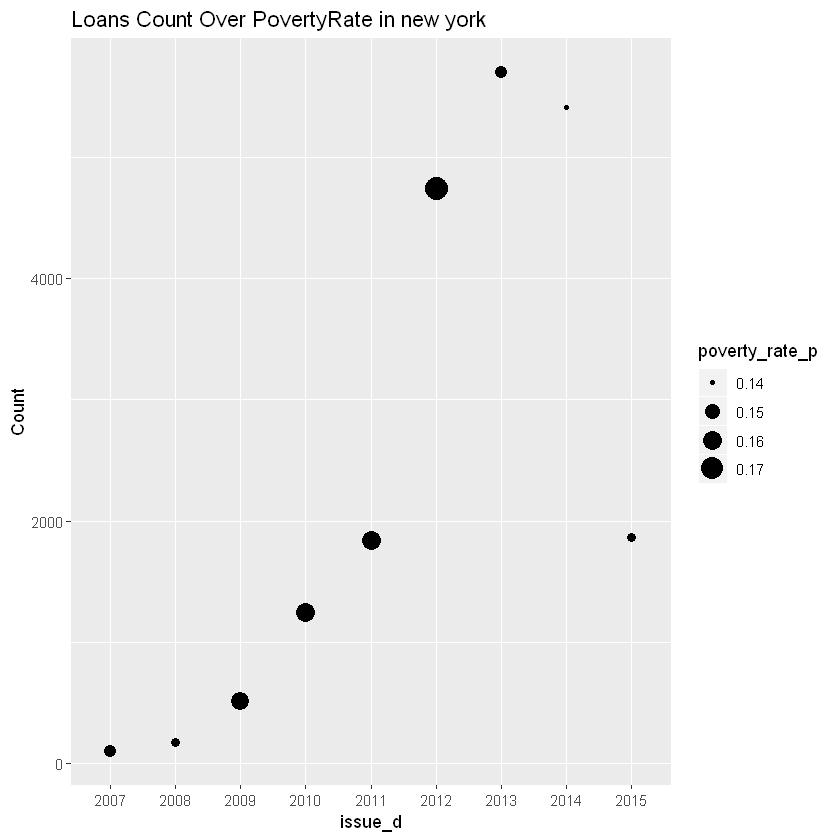

In [94]:
par(mfrow = c(2,1))
#high volume states
statesv <- c("california","new york")
plist<- plotPovertyLoansByCountry(amnt_df,statesv)
for (i in 1:length(plist))
    print(plist[[i]])

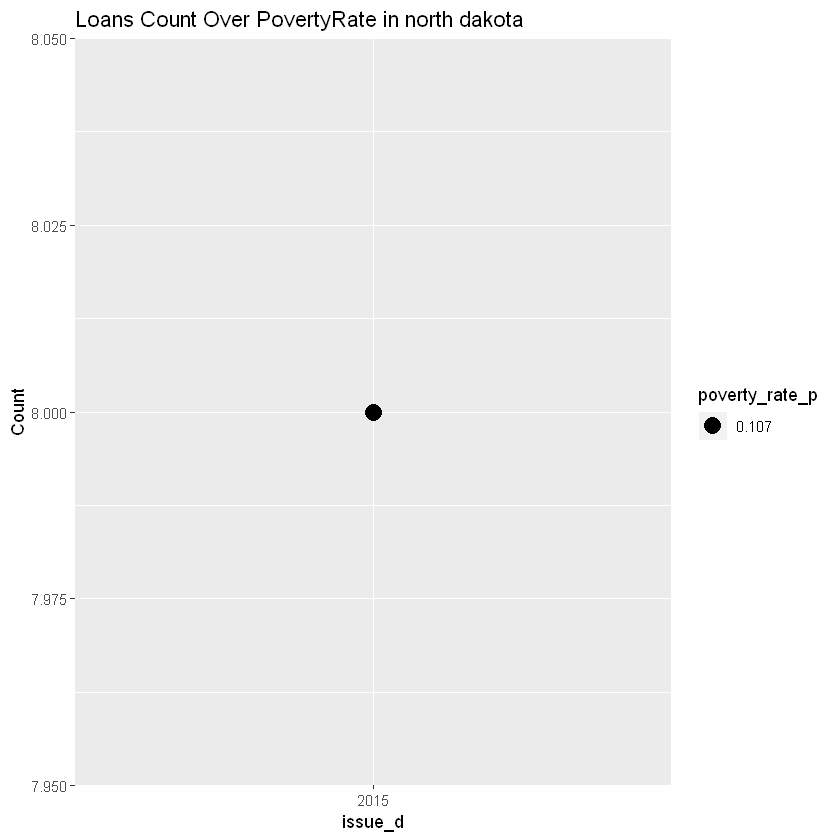

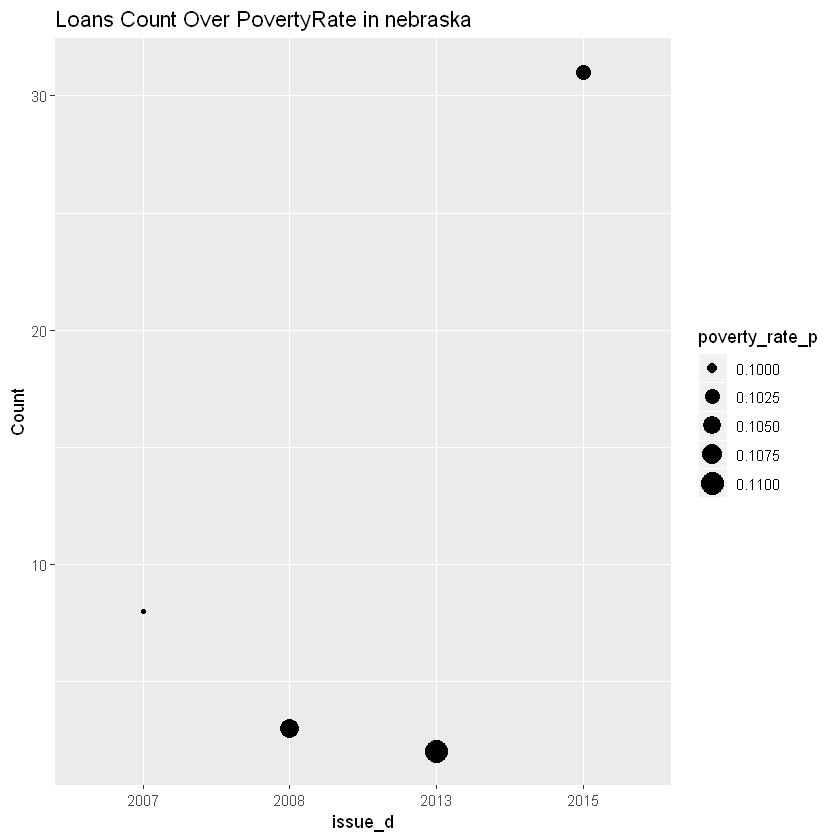

In [96]:
par(mfrow = c(1,2))
#low volume states
statesv <- c("north dakota","nebraska")
plist<- plotPovertyLoansByCountry(amnt_df,statesv)
for (i in 1:length(plist))
    print(plist[[i]])

<b>Loans Over Time</b>
<br>Even though the year variable is not going to be an exploratory variable in our final model ,  
It is an extremely important checking in order to be careful from data biases.


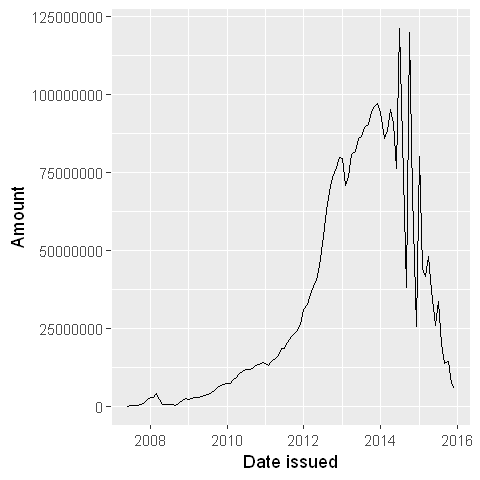

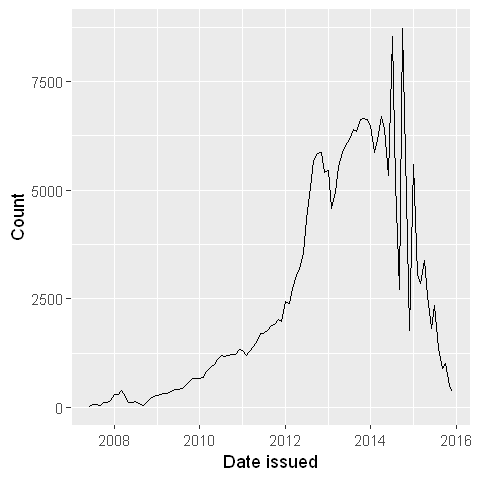

In [52]:
options(scipen = 999)
amnt_df <- loans %>% 
  select(issue_d, loan_amnt) %>% 
  group_by(issue_d) %>% 
  summarise(Amount = sum(loan_amnt),Count = n())

ts_amnt <- ggplot(amnt_df, 
                  aes(x = issue_d, y = Amount))
ts_amnt + geom_line() + xlab("Date issued")
ts_amnt <- ggplot(amnt_df, 
                  aes(x = issue_d, y = Count))
ts_amnt + geom_line() + xlab("Date issued")

In [53]:
time_df <- loans %>% 
  select(issue_d, loan_amnt,default)

In [54]:
time_df$issue_month<-substr(time_df$issue_d,6,7)
time_df$issue_year<-substr(time_df$issue_d,1,4)

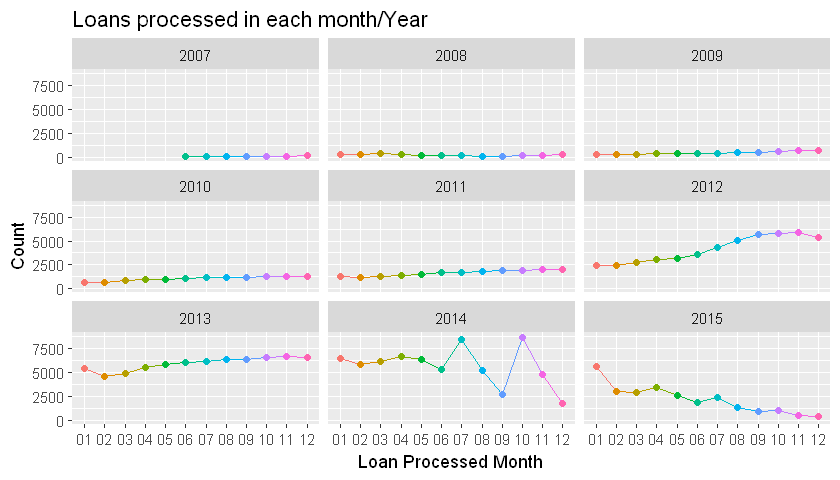

In [55]:
options(repr.plot.width=7, repr.plot.height=4)
time_df %>% group_by(issue_year,issue_month)%>%
summarise(lcnt=n())%>%
ggplot(aes(x=issue_month,y=lcnt,group=1,col=issue_month))+
geom_line()+
facet_wrap(~issue_year)+
geom_point()+
theme(legend.position="")+
labs(x="Loan Processed Month",y="Count",title="Loans processed in each month/Year")


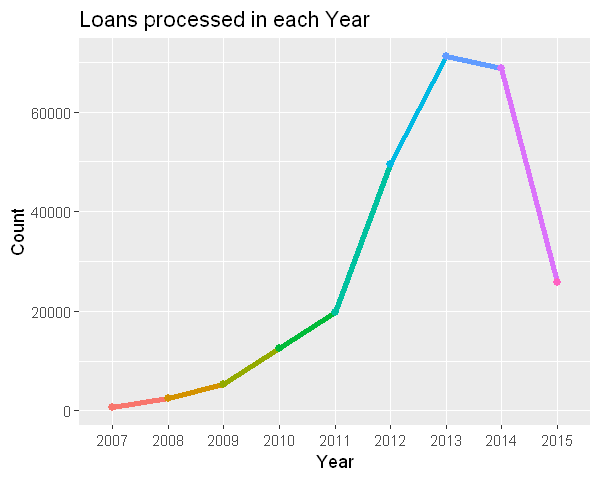

In [56]:
options(repr.plot.width=5, repr.plot.height=4,scipen=10000)
time_df %>% group_by(issue_year)%>%
summarise(lycnt=n())%>%
ggplot(aes(x=issue_year,y=lycnt,group=1,col=issue_year))+
geom_line(size=1.5)+
geom_point(size=2)+
theme(legend.position="")+
labs(x="Year",y="Count",title="Loans processed in each Year")

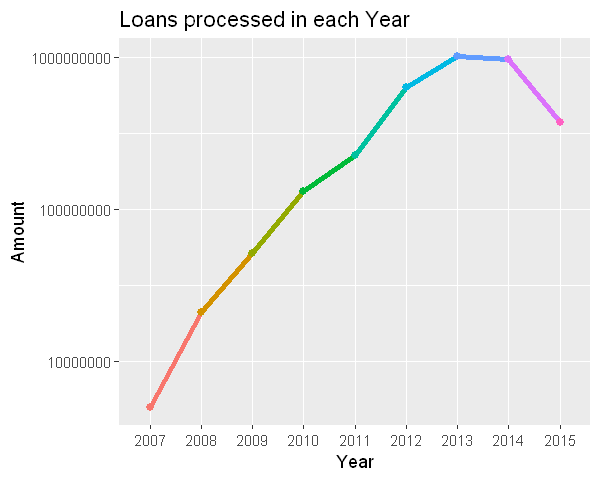

In [57]:
options(repr.plot.width=5, repr.plot.height=4,scipen=999)
time_df %>% group_by(issue_year)%>%
summarise(lycnt=sum(loan_amnt))%>%
ggplot(aes(x=issue_year,y=lycnt,group=1,col=issue_year))+
geom_line(size=1.5)+
geom_point(size=2)+
theme(legend.position="")+
scale_y_log10()+
labs(x="Year",y="Amount",title="Loans processed in each Year")

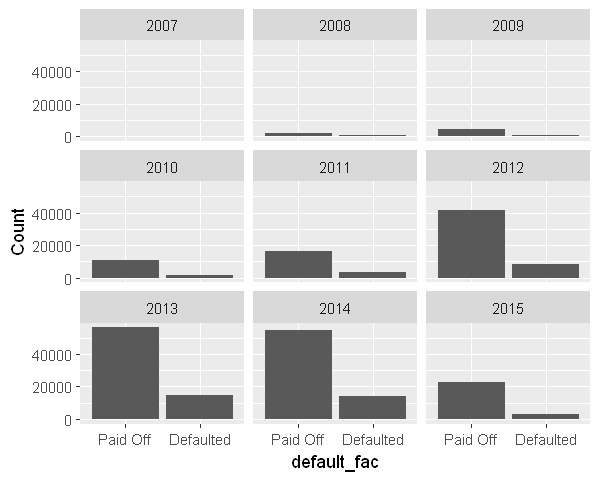

In [58]:
options(repr.plot.width=5, repr.plot.height=4,scipen=9)
time_df2 <- time_df %>% 
  select(default, issue_year) %>% 
  group_by(default,issue_year) %>% 
  summarise(Count = n())
time_df2$default_fac<- factor(time_df2$default,labels=c("Paid Off", "Defaulted"))
time_df2 %>% ggplot(aes(default_fac,Count)) +
geom_bar(stat="identity",position="dodge")+
facet_wrap(~issue_year)



Adding missing grouping variables: `default.x`


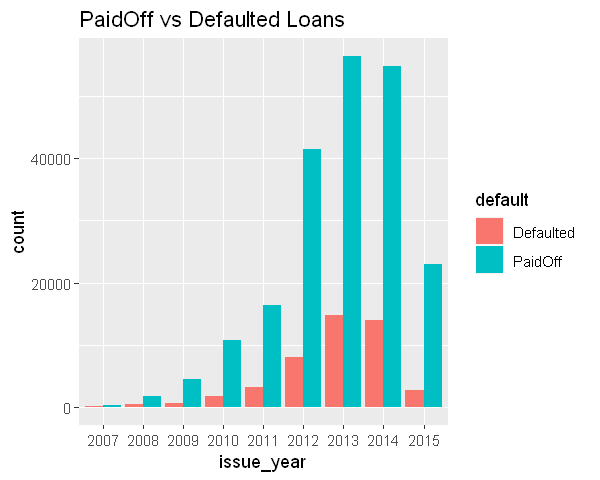

In [59]:
time_df3_0 <- time_df2 %>%select(default,issue_year,Count)%>%
filter(default==0)%>%mutate(PaidOff = Count)
time_df3_1 <- time_df2 %>%select(default,issue_year,Count)%>%
filter(default==1)%>%mutate(Defaulted = Count)


time_df3_sums <-inner_join(time_df3_0,time_df3_1,by ="issue_year" )%>%select(issue_year,PaidOff,Defaulted)


time_df3_sums%>%
gather(key=default,count,PaidOff,Defaulted)%>%
ggplot(aes(x=issue_year,y=count,group=default,fill=default))+
geom_bar(stat="identity",position="dodge")+

labs(title="PaidOff vs Defaulted Loans")



Even though the year variable is not going to be an exploratory variable in our final model,  
it is an extremely important checking in order to be careful from data biases. In the plot above, one can see the different fully paid and defaulted loans in every different year.
We can see, that the loans numbers is in growth by the years, stables at 2014 and decrees at 2015. This dynamic is an outcome of the growth in Lending Club activity over the years and of the fact we have dataset from 2015 and we exclude loans with indefinite status, such as "current" status.


In [61]:
time_df3_sums  %>% select(issue_year,PaidOff,Defaulted)%>%mutate(ratio=Defaulted/(Defaulted+PaidOff))%>% ungroup()%>%select(issue_year,ratio)
  

Adding missing grouping variables: `default.x`


issue_year,ratio
2007,0.2620232
2008,0.2072712
2009,0.1369059
2010,0.1399936
2011,0.1628971
2012,0.1631055
2013,0.2082772
2014,0.2035228
2015,0.1076642


We can see that at 2007 and 2008 the Defaults ratio was higher than later years.
Is the differences between the years are significant? 

In [74]:
loans$issue_year<-as.numeric(factor(time_df$issue_year))

In [75]:
#Chi-Square test
chisq.test(x = loans$issue_year,y = loans$default)


	Pearson's Chi-squared test

data:  loans$issue_year and loans$default
X-squared = 1933.7, df = 8, p-value < 2.2e-16


In [76]:
#exluding 2007 and 2008 issued loans
loans_ex_2008<-loans[ !loans$issue_year%in%c("2007","2008") ,]

In [77]:
chi2<-chisq.test(x = loans_ex_2008$issue_year,y = loans_ex_2008$default)
chi2



	Pearson's Chi-squared test

data:  loans_ex_2008$issue_year and loans_ex_2008$default
X-squared = 1933.7, df = 8, p-value < 2.2e-16


The year variable effect on the defaults is still significant.

<b>Numeric vs Categorical

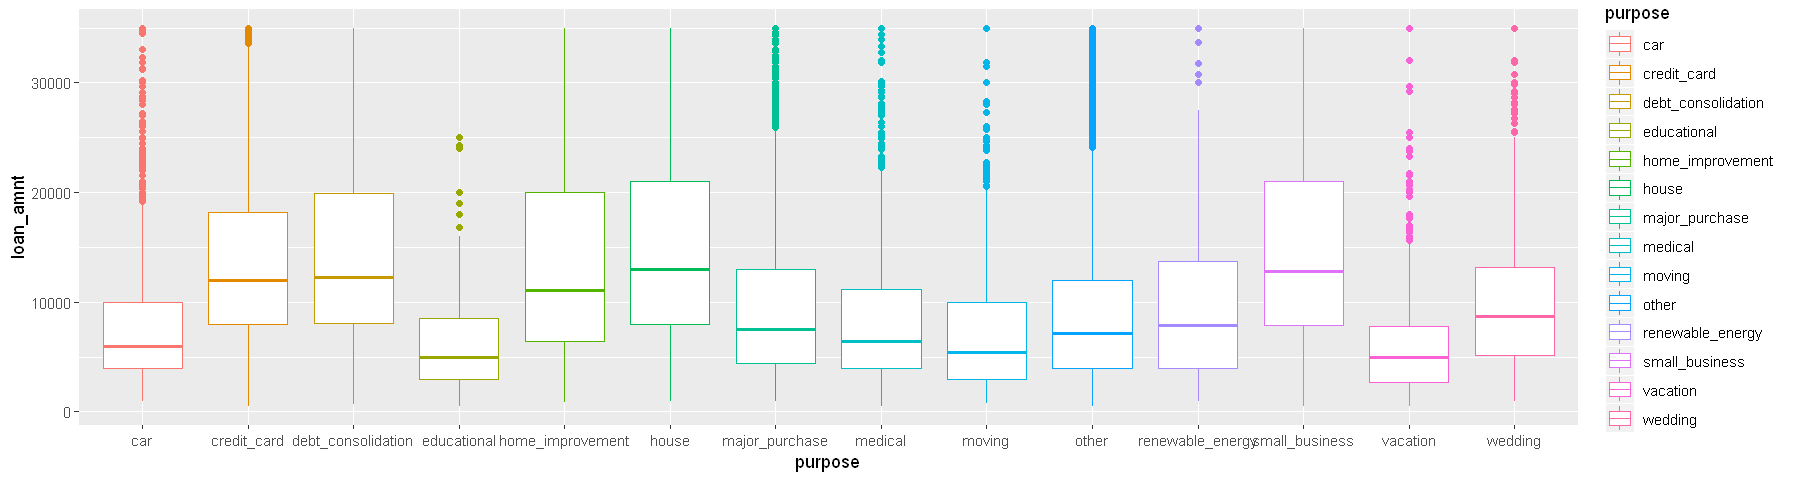

In [18]:
options(repr.plot.width=15, repr.plot.height=4,scipen=999)
p<-ggplot(loans, aes(x=purpose, y=loan_amnt, color=purpose)) +
  geom_boxplot()
p

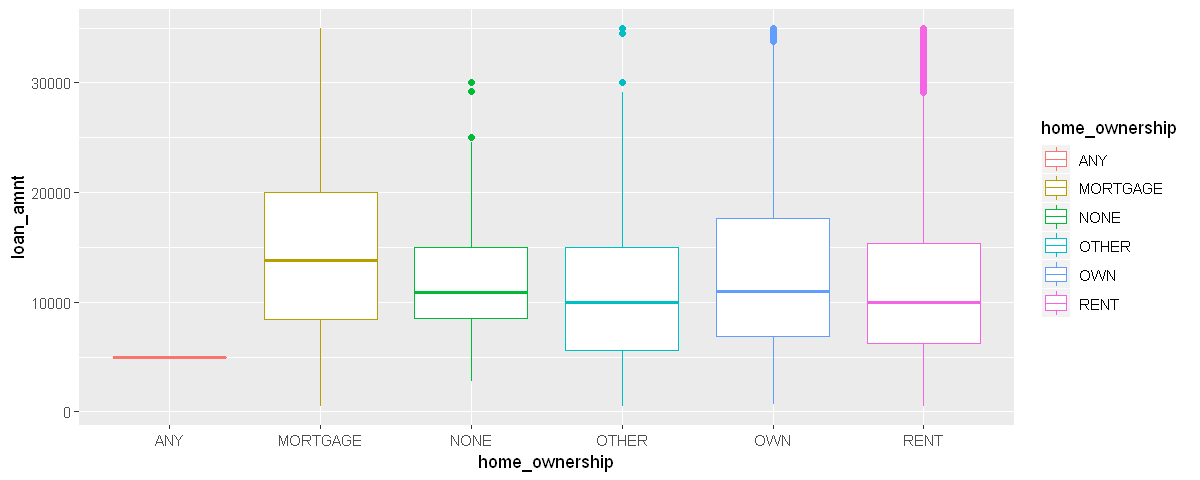

In [20]:
options(repr.plot.width=10, repr.plot.height=4,scipen=999)
p<-ggplot(loans, aes(x=home_ownership, y=loan_amnt, color=home_ownership)) +
  geom_boxplot()
p

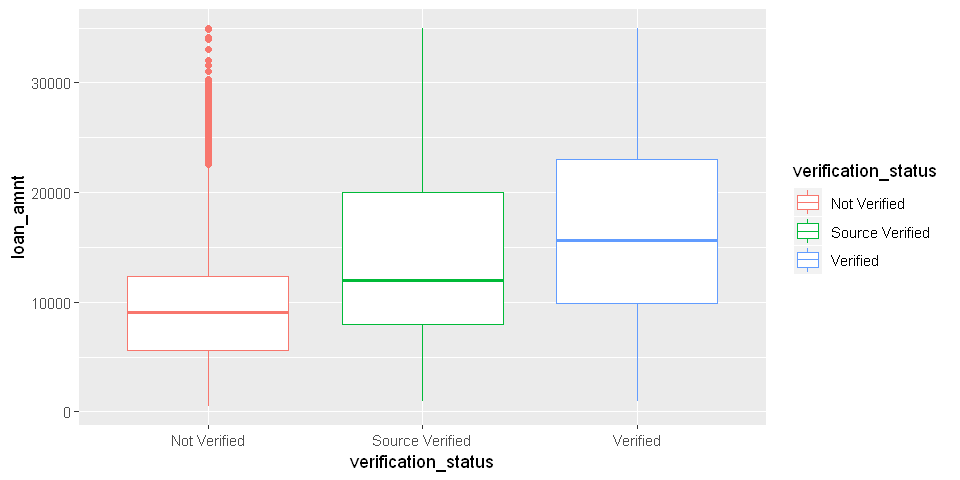

In [21]:
options(repr.plot.width=8, repr.plot.height=4,scipen=999)
p<-ggplot(loans, aes(x=verification_status, y=loan_amnt, color=verification_status)) +
  geom_boxplot()
p

Warning message:
"Removed 29 rows containing non-finite values (stat_boxplot)."

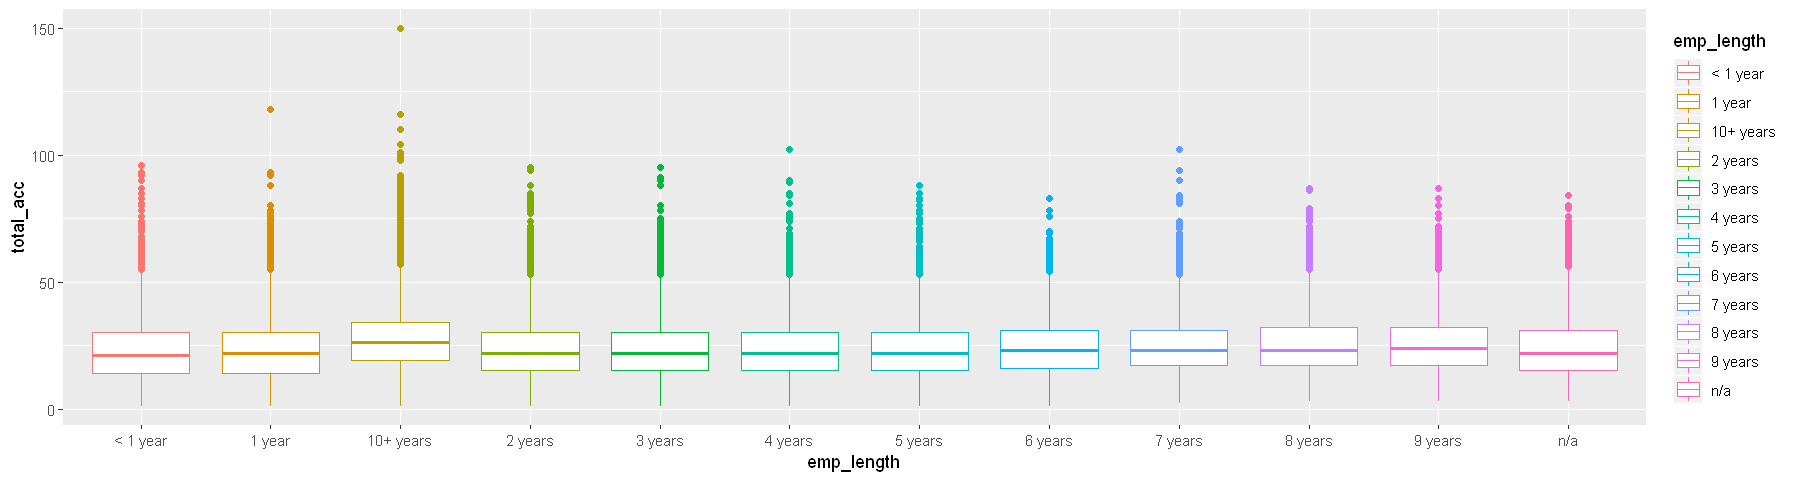

In [22]:
options(repr.plot.width=15, repr.plot.height=4,scipen=999)
p<-ggplot(loans, aes(x=emp_length, y=total_acc, color=emp_length)) +
  geom_boxplot()
p

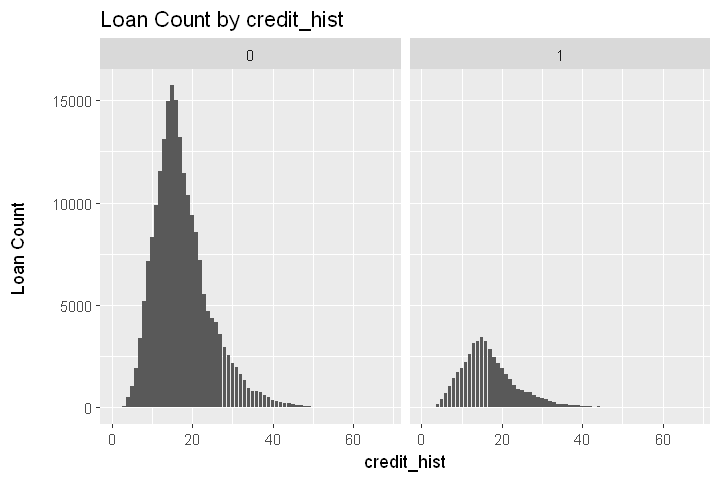

In [133]:
credithistory_df <- loans %>% 
  select(credit_hist,default) %>% 
  group_by(credit_hist,default) %>% 
  summarise(Count = n())%>% 
select(credit_hist,Count,default) 

credithistory_df %>%
  ggplot(aes(credit_hist,Count)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Count by credit_hist", x = "credit_hist", y = "Loan Count \n")

<b>Numeric vs Numeric

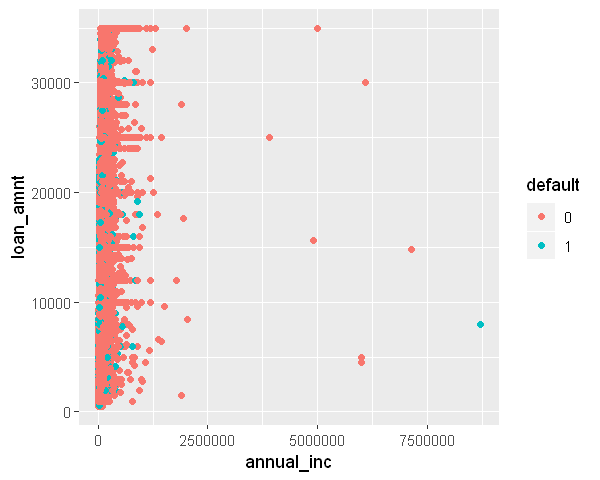

In [114]:
loans %>%
  ggplot(aes(x = annual_inc, y = loan_amnt, color = default)) +
  geom_point()

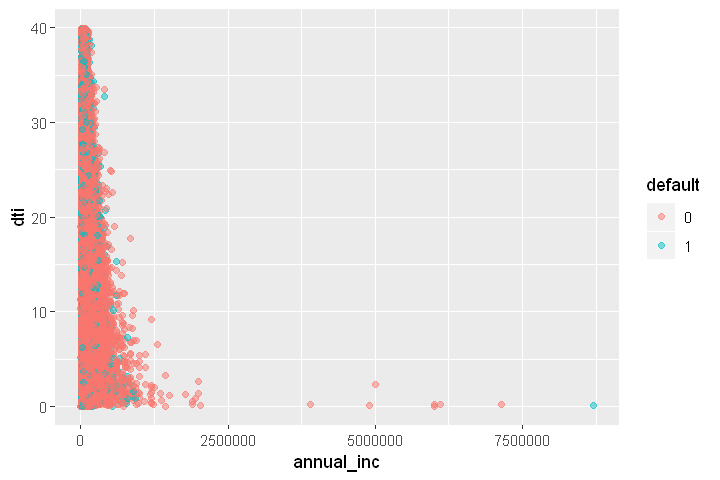

In [115]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(loans, aes(x = annual_inc, y = dti, color = default)) + 
geom_point(alpha=0.5)

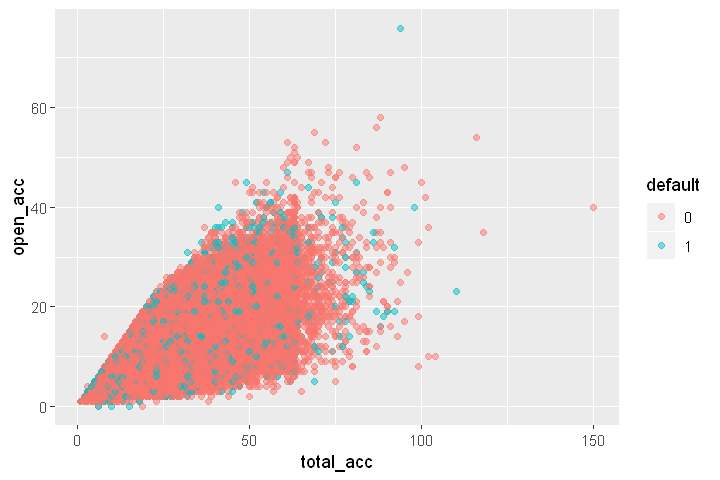

In [128]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(loans, aes(x = total_acc, y = open_acc, color = default )) + geom_point(alpha = 0.5)

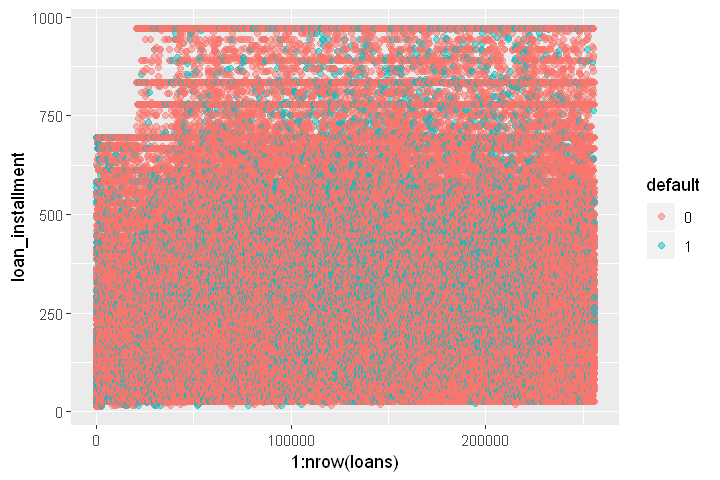

In [17]:
options(repr.plot.width=6, repr.plot.height=4,scipen=9999)
ggplot(loans, aes(x = 1:nrow(loans), y =loan_installment, color = default )) + geom_point(alpha = 0.5)


<b> Pairs

In [117]:
#Important variables 
imv<-c('verification_status', 'loan_amnt', 'purpose' , 'term', 
'annual_inc', 'dti' , 'loan_installment', 'funded_amnt_inv','revol_util' )

In [118]:
#sample data 
set.seed(123)
loansemp<- loans[sample(nrow(loans), 20000), ]

In [119]:
#dfinne a panel.hist fuction
panel.hist <- function(x, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
}



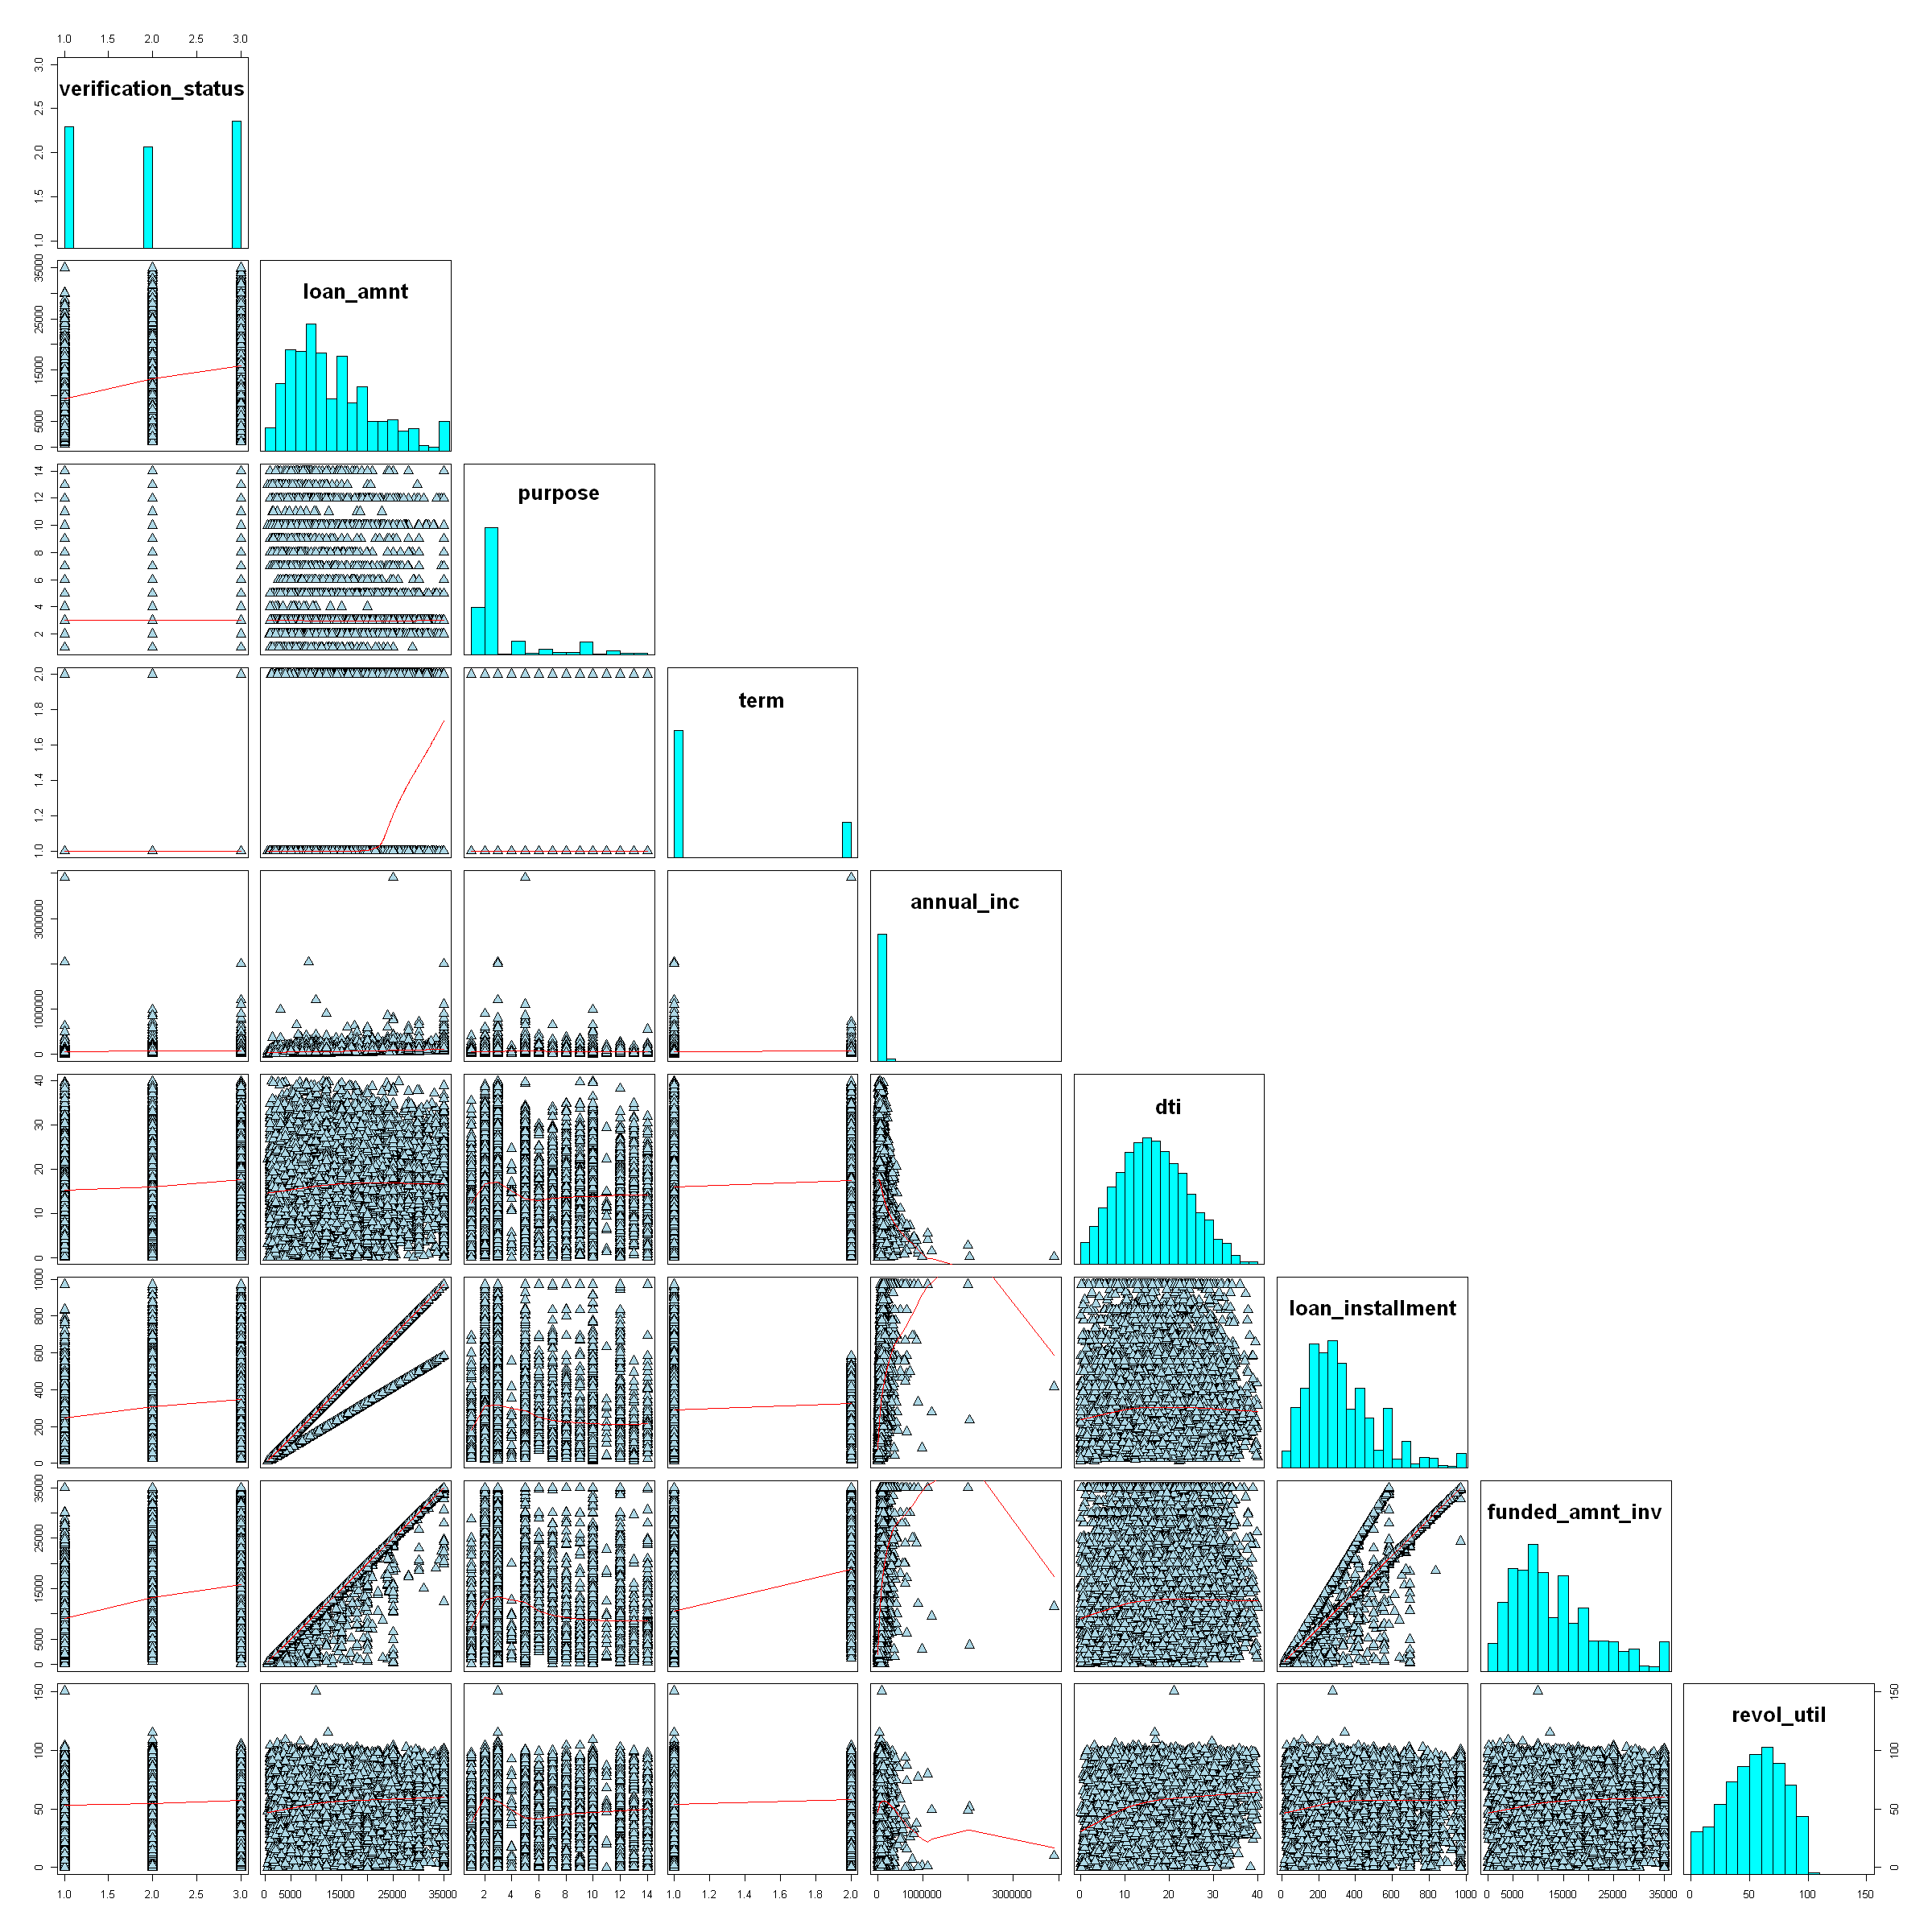

In [120]:
#pairs plot 
options(repr.plot.width = 20, repr.plot.height = 20)
pairs(loansemp[imv], panel = panel.smooth,
      cex = 1.5,pch = 24,  bg = "light blue",  upper.panel = NULL,      
       diag.panel = panel.hist, cex.labels = 2, font.labels = 2)


From the pairs plot we can study that:
1.	There is a positive and high correlation between loan_amnt, funded_amnt_inv and loan installment. Furthermore, It is seems like funded_amnt_inv are equal to loan amount for most of the loans. Even though, there are some cases when they differ from each other.
2.	We can identify tow lines in the scatter plot of loan installment and loans amount. Those lines are an outcome of the two possible different time terms of the loans (36 month of 60 month). That because the installment variable is an outcome of the loan amount variable divided by the loan time term.
3.	It is very hard to see any correlation between dti and the others variables.
4.	It is seems like revol_util is not strongly correlated with any other variable. Although, it may correlated with dti.
5.	We can identify some samples that are suspects as an outliers in the loan_installment and the funded_inv scatter plots.
6.	We can see that in 36 month term period the loan installment is higher than in the 60 month term period.
7.	It is seems like annual_inc distribute exponential with a lot of samples in the low part of the distribution.
8.	It seems like when term is 36 month the average loan amount is lower than if term is 60 month.


 



correlation for the pairs plot's numeric varebels

In [28]:
nimv<-c( 'loan_amnt', 
'annual_inc', 'dti' , 'loan_installment', 'funded_amnt_inv','revol_util' )

In [29]:

corr <- round(cor(loans[nimv]), 3)
corr

,loan_amnt,annual_inc,dti,loan_installment,funded_amnt_inv,revol_util
loan_amnt,1.000,NA,0.054,0.900,0.990,NA
annual_inc,NA,1,NA,NA,NA,NA
dti,0.054,NA,1.000,0.025,0.062,NA
loan_installment,0.900,NA,0.025,1.000,0.890,NA
funded_amnt_inv,0.990,NA,0.062,0.890,1.000,NA
revol_util,NA,NA,NA,NA,NA,1


<b>The outcome of the correlation table is consistent with our conclusions from the pairs plot.

In [30]:
## visualization
options(repr.plot.width = 11, repr.plot.height = 11)
ggcorrplot(corr, method = "circle")

ERROR: Error in ggcorrplot(corr, method = "circle"): could not find function "ggcorrplot"
